# 🏗️ Extraction de Plans Numériques depuis PDF d'Architecte

## 📋 Projet: Extraction Automatique de Plans Numériques Exploitables

**Objectif**: Créer un outil d'extraction automatique de plans numériques exploitables (format vectoriel ou BIM) à partir de documents PDF d'architecte grâce à la vision par ordinateur et au deep learning.

**Binome :**
- Liza Hamadene
- -Linda Hind Sel

**Livrable**: Notebook unique et complet avec pipeline end-to-end

---

## Guide Rapide d'Utilisation

### Démarrage Rapide (3 étapes)

```python
# 1. Exécuter Section 1 (Setup) - OBLIGATOIRE
# 2. Placer vos PDFs dans data/pdfs/
# 3. Exécuter ce code:

pdf_path = "data/pdfs/mon_plan.pdf"
result = process_pdf(pdf_path)  # Extraction
annotations = labeler.label_image(result['saved_paths'][0])  # Détection
labeler.visualize_annotations(result['saved_paths'][0], annotations)  # Visualiser
plt.show()
```

###  Documentation Complète

Voir le fichier **`GUIDE_UTILISATION.md`** pour:
- Installation détaillée
- Configuration complète
- Workflow étape par étape
- Détection et extraction
- Visualisation des résultats
- Dépannage

---

##  Architecture du Pipeline

```
PDF Input -> Extraction Images -> Preprocessing -> Détection (YOLO) -> Segmentation -> 
Post-processing -> Export Vectoriel/BIM -> Visualisation -> Stockage Snowflake
```

---

##  Structure du Notebook

1. **Setup et Imports** - Configuration environnement ⚠️ OBLIGATOIRE
2. **Snowflake Configuration** - Connexion et schémas (optionnel)
3. **Extraction PDF** - Conversion PDF → Images ⚠️ OBLIGATOIRE
4. **Génération Données LLM** - Augmentation avec IA générative (optionnel)
5. **Labellisation** - Automatique et manuelle ⚠️ OBLIGATOIRE
6. **Entraînement YOLO** - Fine-tuning modèles (optionnel, long)
7. **Inférence** - Extraction sur nouveaux PDF ⚠️ OBLIGATOIRE
8. **Visualisation** - Dashboard interactif ⚠️ OBLIGATOIRE
9. **Tests et Validation** - Métriques et qualité (recommandé)


# Section 1: Setup et Imports

## 1.1 Installation des dépendances (à exécuter une seule fois)


## 1.4 Téléchargement des Modèles YOLO (Optionnel - Première Utilisation)

Les modèles YOLO seront téléchargés automatiquement lors de leur première utilisation, mais vous pouvez les pré-télécharger ici pour éviter les attentes.


In [ ]:
# ============================================================================
# TÉLÉCHARGEMENT DES MODÈLES YOLO
# ============================================================================
# 
# IMPORTANT: Les modèles seront téléchargés automatiquement lors de leur 
# première utilisation dans la Section 5. Cette cellule est optionnelle 
# mais recommandée pour pré-télécharger les modèles.
#
# Méthodes alternatives:
# 1. Exécuter cette cellule dans le notebook (RECOMMANDÉ)
# 2. Créer un script Python séparé (voir ci-dessous)
# 3. Utiliser PowerShell/terminal (voir ci-dessous)
# ============================================================================

print("Téléchargement des modèles YOLO...")
print("Cela peut prendre quelques minutes lors du premier téléchargement...\n")

try:
    # Modèle détection (le plus utilisé)
    print("Téléchargement: yolo11n.pt (Détection)...")
    model_det = YOLO("yolo11n.pt")
    print("   Modèle détection téléchargé\n")
    
    # Modèle segmentation
    print("Téléchargement: yolo11n-seg.pt (Segmentation)...")
    model_seg = YOLO("yolo11n-seg.pt")
    print("  Modèle segmentation téléchargé\n")
    
    # Modèle keypoints
    print("Téléchargement: yolo11n-pose.pt (Keypoints)...")
    model_kpt = YOLO("yolo11n-pose.pt")
    print("   Modèle keypoints téléchargé\n")
    
    print("=" * 60)
    print("TOUS LES MODÈLES SONT TÉLÉCHARGÉS!")
    print("=" * 60)
    print("\n Les modèles sont sauvegardés dans:")
    print(f"   {Path.home() / '.ultralytics'}")
    
except Exception as e:
    print(f"Erreur lors du téléchargement: {e}")
    print("\n Les modèles seront téléchargés automatiquement lors de leur première utilisation")
    print("   Vous pouvez continuer avec le notebook, le téléchargement se fera dans la Section 5")


### 📝 Méthodes Alternatives de Téléchargement

Si vous préférez télécharger les modèles en dehors du notebook:

**Option 1: Script Python séparé**
```bash
# Créer un fichier download_models.py
# Puis exécuter:
python download_models.py
```

**Option 2: PowerShell/CMD (Windows)**
```powershell
# Activer l'environnement virtuel d'abord
venv\Scripts\activate

# Puis exécuter Python directement
python -c "from ultralytics import YOLO; YOLO('yolo11n.pt'); YOLO('yolo11n-seg.pt'); YOLO('yolo11n-pose.pt')"
```

**Option 3: Terminal Linux/Mac**
```bash
# Activer l'environnement virtuel
source venv/bin/activate

# Exécuter
python -c "from ultralytics import YOLO; YOLO('yolo11n.pt'); YOLO('yolo11n-seg.pt'); YOLO('yolo11n-pose.pt')"
```

**Note**: Les modèles seront téléchargés automatiquement lors de leur première utilisation dans la Section 5 si vous ne les téléchargez pas maintenant.


In [1]:
# Installation des packages nécessaires (décommenter si nécessaire)
!pip install opencv-python pillow scikit-image ultralytics torch torchvision
!pip install PyMuPDF pdf2image pdfplumber
!pip install openai anthropic transformers langchain
!pip install diffusers controlnet-aux
!pip install snowflake-connector-python snowflake-sqlalchemy
!pip install matplotlib plotly seaborn
!pip install ezdxf ifcopenshell
!pip install pandas numpy scipy
!pip install ipywidgets



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1.2 Imports standards


In [1]:
# Imports standards
import os
import sys
import json
import warnings
from pathlib import Path
from datetime import datetime
from typing import List, Dict, Tuple, Optional
import base64
from io import BytesIO

# Data manipulation
import pandas as pd
import numpy as np

# Computer Vision
import cv2
from PIL import Image, ImageDraw, ImageFont
import skimage
from skimage import filters, morphology, transform

# PDF Processing
import fitz  # PyMuPDF
from pdf2image import convert_from_path
import pdfplumber

# Deep Learning
import torch
import torchvision
from ultralytics import YOLO
from ultralytics.utils import LOGGER

# LLM and Generative AI
try:
    from anthropic import Anthropic
    ANTHROPIC_AVAILABLE = True
except ImportError:
    ANTHROPIC_AVAILABLE = False
    print("Anthropic non disponible, utiliser un modèle local")

try:
    from transformers import pipeline
    TRANSFORMERS_AVAILABLE = True
except ImportError:
    TRANSFORMERS_AVAILABLE = False

# Snowflake
try:
    import snowflake.connector
    from snowflake.connector.pandas_tools import write_pandas
    SNOWFLAKE_AVAILABLE = True
except ImportError:
    SNOWFLAKE_AVAILABLE = False
    print("Snowflake non disponible")

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

# Export formats

try:
    import ezdxf
    EZDXF_AVAILABLE = True
except ImportError:
    EZDXF_AVAILABLE = False

try:
    import ifcopenshell
    IFC_AVAILABLE = True
except ImportError:
    IFC_AVAILABLE = False

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Tous les imports sont réussis!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA disponible: {torch.cuda.is_available()}")


✅ Tous les imports sont réussis!
PyTorch version: 2.9.1+cpu
CUDA disponible: False


## 1.3 Configuration globale et variables


In [2]:
from pathlib import Path 
import os 
from dotenv import load_dotenv 

# Charger le fichier .env AVANT d'accéder aux variables 
load_dotenv()

# ============================================================================
# CONFIGURATION GLOBALE
# ============================================================================

class Config:
    """Configuration centrale du projet"""
    
    # Chemins
    BASE_DIR = Path(".")
    DATA_DIR = BASE_DIR / "data"
    PDF_DIR = DATA_DIR / "pdfs"
    IMAGES_DIR = DATA_DIR / "images"
    ANNOTATIONS_DIR = DATA_DIR / "annotations"
    MODELS_DIR = BASE_DIR / "models"
    OUTPUT_DIR = BASE_DIR / "output"
    
    # Création des répertoires
    for dir_path in [DATA_DIR, PDF_DIR, IMAGES_DIR, ANNOTATIONS_DIR, MODELS_DIR, OUTPUT_DIR]:
        dir_path.mkdir(parents=True, exist_ok=True)
    
    # Paramètres PDF
    PDF_DPI = 300  # Résolution pour conversion PDF → Image
    PDF_SCALE = 2.0  # Facteur d'échelle
    
    # Paramètres preprocessing
    IMAGE_SIZE = (1024, 1024)  # Taille standardisée
    BINARY_THRESHOLD = 127  # Seuil binarisation
    
    # Classes YOLO (éléments architecturaux)
    CLASSES = {
        0: "porte",
        1: "fenetre",
        2: "mur",
        3: "escalier",
        4: "colonne",
        5: "sanitaire",
        6: "cuisine",
        7: "couloir",
        8: "piece",
        9: "balcon"
    }
    
    # Paramètres YOLO
    YOLO_MODEL_DETECTION = "yolo11n.pt"  # Modèle pré-entraîné détection
    YOLO_MODEL_SEGMENTATION = "yolo11n-seg.pt"  # Modèle segmentation
    YOLO_MODEL_KEYPOINTS = "yolo11n-pose.pt"  # Modèle keypoints
    YOLO_IMG_SIZE = 640
    YOLO_CONF_THRESHOLD = 0.25
    YOLO_IOU_THRESHOLD = 0.45
    
    # Paramètres LLM
    LLM_MODEL = "claude-3-haiku-20240307"  
    LLM_TEMPERATURE = 0.7
    NUM_SCENARIOS = 5  # Nombre de scénarios à générer
    
    # Paramètres Snowflake
    SNOWFLAKE_ACCOUNT = os.getenv("SNOWFLAKE_ACCOUNT", "")
    SNOWFLAKE_USER = os.getenv("SNOWFLAKE_USER", "")
    SNOWFLAKE_PASSWORD = os.getenv("SNOWFLAKE_PASSWORD", "")
    SNOWFLAKE_PRIVATE_KEY_PATH = os.getenv("SNOWFLAKE_PRIVATE_KEY_PATH")
    SNOWFLAKE_WAREHOUSE = os.getenv("SNOWFLAKE_WAREHOUSE", "COMPUTE_WH")
    SNOWFLAKE_DATABASE = os.getenv("SNOWFLAKE_DATABASE", "ARCHITECTURE_DB")
    SNOWFLAKE_SCHEMA = os.getenv("SNOWFLAKE_SCHEMA", "PLANS_SCHEMA")
    
    # Paramètres génération données
    AUGMENTATION_ROTATIONS = [90, 180, 270]
    AUGMENTATION_FLIP = True
    AUGMENTATION_SCALE = [0.8, 1.0, 1.2]
    AUGMENTATION_NOISE = True

# Instance globale de configuration
config = Config()

print("✅ Configuration initialisée!")
print(f"📁 Répertoires créés: {[str(d) for d in [config.DATA_DIR, config.MODELS_DIR, config.OUTPUT_DIR]]}")


✅ Configuration initialisée!
📁 Répertoires créés: ['data', 'models', 'output']


In [3]:
# ============================================================================
# CONNEXION SNOWFLAKE
# ============================================================================

import snowflake.connector 
import os 
from cryptography.hazmat.primitives import serialization
from typing import Dict


class SnowflakeManager:
    """Gestionnaire de connexion et opérations Snowflake"""
    
    def __init__(self, config):
        self.config = config
        self.conn = None
        self.cursor = None
        
    def connect(self):
        """Établit la connexion à Snowflake"""
        if not SNOWFLAKE_AVAILABLE:
            print("⚠️ Snowflake non disponible, mode simulation activé")
            return False
            
        try:
            # Charger la clé privée RSA
            with open(self.config.SNOWFLAKE_PRIVATE_KEY_PATH, "rb") as key_file:
                private_key = serialization.load_pem_private_key(
                    key_file.read(),
                    password=None,
                )

            # Connexion Snowflake
            self.conn = snowflake.connector.connect(
                user=self.config.SNOWFLAKE_USER,
                account=self.config.SNOWFLAKE_ACCOUNT,
                private_key=private_key,
                warehouse=self.config.SNOWFLAKE_WAREHOUSE,
                database=self.config.SNOWFLAKE_DATABASE,
                schema=self.config.SNOWFLAKE_SCHEMA
            )

            self.cursor = self.conn.cursor()
            print("✅ Connexion Snowflake réussie!")
            return True
        except Exception as e:
            print(f"❌ Erreur connexion Snowflake: {e}")
            print("💡 Mode simulation activé (pas de connexion réelle)")
            return False
    
    def execute_query(self, query: str, fetch: bool = True):
        """Exécute une requête SQL"""
        if not self.conn:
            print(f"⚠️ Mode simulation - Requête: {query[:100]}...")
            return None
        try:
            self.cursor.execute(query)
            if fetch:
                return self.cursor.fetchall()
            return True
        except Exception as e:
            print(f"❌ Erreur requête: {e}")
            return None
    
    def create_schema(self):
        """Crée le schéma et les tables nécessaires"""
        queries = [
            f"CREATE DATABASE IF NOT EXISTS {self.config.SNOWFLAKE_DATABASE}",
            f"USE DATABASE {self.config.SNOWFLAKE_DATABASE}",
            f"CREATE SCHEMA IF NOT EXISTS {self.config.SNOWFLAKE_SCHEMA}",
            f"USE SCHEMA {self.config.SNOWFLAKE_SCHEMA}",
            """
            CREATE TABLE IF NOT EXISTS plans_metadata (
                id VARCHAR(255) PRIMARY KEY,
                nom_fichier VARCHAR(500),
                date_upload TIMESTAMP,
                dimensions_width INT,
                dimensions_height INT,
                nombre_pages INT,
                taille_fichier_kb FLOAT,
                metadata_json VARIANT,
                created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP()
            )
            """,
            """
            CREATE TABLE IF NOT EXISTS annotations (
                id VARCHAR(255) PRIMARY KEY,
                plan_id VARCHAR(255),
                classe VARCHAR(50),
                bbox_x FLOAT,
                bbox_y FLOAT,
                bbox_width FLOAT,
                bbox_height FLOAT,
                confidence FLOAT,
                segmentation_points VARIANT,
                keypoints VARIANT,
                created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP(),
                FOREIGN KEY (plan_id) REFERENCES plans_metadata(id)
            )
            """,
            """
            CREATE TABLE IF NOT EXISTS model_versions (
                id VARCHAR(255) PRIMARY KEY,
                version VARCHAR(50),
                model_type VARCHAR(50),
                mAP FLOAT,
                precision FLOAT,
                recall FLOAT,
                date_entrainement TIMESTAMP,
                chemin_modele VARCHAR(500),
                hyperparameters VARIANT,
                created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP()
            )
            """,
            """
            CREATE TABLE IF NOT EXISTS scenarios_llm (
                scenario_id VARCHAR(255) PRIMARY KEY,
                parametres_json VARIANT,
                image_generee_url VARCHAR(1000),
                type_plan VARCHAR(100),
                nombre_elements INT,
                created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP()
            )
            """
        ]
        
        for query in queries:
            self.execute_query(query, fetch=False)
        
        print("✅ Schéma Snowflake créé avec succès!")
    
    

    def insert_plan_metadata(self, plan_data: Dict):

        query = """
        INSERT INTO plans_metadata (
            id, nom_fichier, date_upload, dimensions_width, 
            dimensions_height, nombre_pages, taille_fichier_kb, metadata_json
        )
        SELECT 
            %(id)s, 
            %(nom_fichier)s, 
            %(date_upload)s, 
            %(dimensions_width)s, 
            %(dimensions_height)s, 
            %(nombre_pages)s, 
            %(taille_fichier_kb)s, 
            PARSE_JSON(%(metadata_json)s)
        """
        params = {
            "id": plan_data["id"],
            "nom_fichier": plan_data["nom_fichier"],
            "date_upload": plan_data["date_upload"],
            "dimensions_width": plan_data["dimensions_width"],
            "dimensions_height": plan_data["dimensions_height"],
            "nombre_pages": plan_data["nombre_pages"],
            "taille_fichier_kb": plan_data["taille_fichier_kb"],
            "metadata_json": json.dumps(plan_data["metadata_json"])
        }    
        try:
            self.cursor.execute(query, params)
            self.conn.commit()  # Important: commit les changements
            print(f"Métadonnées insérées pour {plan_data['nom_fichier']}")
            return True
        except Exception as e:
            print(f" Erreur insertion Snowflake: {e}")
            # Afficher les paramètres pour debug
            print(f"Paramètres: {params}")
            self.conn.rollback()  # Annuler en cas d'erreur
            return False

    
    def close(self):
        """Ferme la connexion"""
        if self.cursor:
            self.cursor.close()
        if self.conn:
            self.conn.close()
        print("✅ Connexion Snowflake fermée")

# Initialisation
SNOWFLAKE_AVAILABLE = True
snowflake_mgr = SnowflakeManager(config)
snowflake_connected = snowflake_mgr.connect()

if snowflake_connected:
    snowflake_mgr.create_schema()
else:
    print(" Le notebook fonctionnera en mode simulation (sans Snowflake réel)")


✅ Connexion Snowflake réussie!
✅ Schéma Snowflake créé avec succès!


# Section 3: Extraction et Preprocessing PDF

## ❓ Pourquoi convertir les PDF en images ?

### Raisons techniques principales :

1. **📸 Format natif des modèles de Deep Learning**
   - YOLO, et tous les modèles de computer vision, travaillent avec des **matrices de pixels** (images)
   - PyTorch/TensorFlow nécessitent des formats image (PNG, JPEG) pour les tensors
   - Les PDFs sont des formats **vectoriels/textuels complexes** non compatibles directement

2. **🔧 Preprocessing nécessaire**
   - Binarisation, dénoisage, correction d'orientation → nécessitent des images
   - OpenCV et scikit-image travaillent sur des arrays NumPy (représentation d'images)
   - Les opérations morphologiques (érosion, dilatation) s'appliquent aux pixels

3. **📊 Annotations YOLO**
   - Format YOLO: coordonnées normalisées basées sur les **dimensions de l'image** (width, height)
   - Les bounding boxes sont définies en pixels, pas en coordonnées vectorielles PDF
   - La segmentation nécessite des masques d'images (matrices binaires)

4. **⚡ Performance et standardisation**
   - Images = format universel et standardisé pour computer vision
   - Plus rapide à traiter qu'un parsing complexe de PDF
   - Compatible avec toutes les bibliothèques de vision par ordinateur

5. **🔄 Pipeline cohérent**
   - Toutes les étapes (augmentation, labellisation, entraînement) utilisent des images
   - Facilite le workflow: PDF → Image → Traitement → Export vectoriel

### ⚠️ Note importante :
- La conversion PDF → Image est une **étape intermédiaire nécessaire**
- On **reconvertit ensuite en format vectoriel** (DXF, IFC) à la fin du pipeline
- On ne perd pas la qualité: conversion haute résolution (300 DPI minimum)

---

## 3.1 Extraction des pages PDF en images


In [4]:
# ============================================================================
# EXTRACTION PDF -> IMAGES
# ============================================================================
from typing import List
from PIL import Image
from io import BytesIO
import json

class PDFExtractor:
    """Extracteur de pages PDF vers images"""
    
    def __init__(self, config):
        self.config = config
    
    def extract_pages_pymupdf(self, pdf_path: str) -> List[Image.Image]:
        """
        Extrait les pages d'un PDF en images haute qualité avec PyMuPDF
        
        Args:
            pdf_path: Chemin vers le fichier PDF
            
        Returns:
            Liste d'images PIL
        """
        images = []
        try:
            doc = fitz.open(pdf_path)
            print(f"PDF ouvert: {len(doc)} pages")
            
            for page_num in range(len(doc)):
                page = doc[page_num]
                
                # Matrice de transformation pour haute résolution
                mat = fitz.Matrix(self.config.PDF_SCALE, self.config.PDF_SCALE)
                pix = page.get_pixmap(matrix=mat)
                
                # Conversion en PIL Image
                img_data = pix.tobytes("png")
                img = Image.open(BytesIO(img_data))
                images.append(img)
                
                print(f" Page {page_num + 1} extraite: {img.size}")
            
            doc.close()
            return images
            
        except Exception as e:
            print(f"Erreur extraction PyMuPDF: {e}")
            return []
    
    def extract_pages_pdf2image(self, pdf_path: str) -> List[Image.Image]:
        """
        Alternative: Extraction avec pdf2image (nécessite poppler)
        
        Args:
            pdf_path: Chemin vers le fichier PDF
            
        Returns:
            Liste d'images PIL
        """
        try:
            images = convert_from_path(
                pdf_path,
                dpi=self.config.PDF_DPI,
                fmt='png'
            )
            print(f"{len(images)} pages extraites avec pdf2image")
            return images
        except Exception as e:
            print(f"Erreur extraction pdf2image: {e}")
            return []
    
    def save_extracted_images(self, images: List[Image.Image], 
                             pdf_name: str, output_dir: Path) -> List[str]:
        """
        Sauvegarde les images extraites
        
        Args:
            images: Liste d'images PIL
            pdf_name: Nom du PDF (sans extension)
            output_dir: Répertoire de sortie
            
        Returns:
            Liste des chemins des images sauvegardées
        """
        saved_paths = []
        output_dir.mkdir(parents=True, exist_ok=True)
        
        for idx, img in enumerate(images):
            img_path = output_dir / f"{pdf_name}_page_{idx+1:03d}.png"
            img.save(img_path, "PNG", quality=95)
            saved_paths.append(str(img_path))
            print(f"  Image sauvegardée: {img_path.name}")
        
        return saved_paths

    def get_pdf_metadata(self, pdf_path: str) -> Dict:
        try:
            doc = fitz.open(pdf_path)
    
            metadata = doc.metadata
            nombre_pages = len(doc)
    
            doc.close()
    
            file_size = os.path.getsize(pdf_path) / 1024  # KB
    
            return {
                'nombre_pages': nombre_pages,
                'taille_fichier_kb': file_size,
                'titre': metadata.get('title', ''),
                'auteur': metadata.get('author', ''),
                'sujet': metadata.get('subject', ''),
                'date_creation': metadata.get('creationDate', '')
            }
    
        except Exception as e:
            print(f"Erreur métadonnées: {e}")
            return {}


    
# Test d'extraction
extractor = PDFExtractor(config)

# Exemple d'utilisation 
print("Exemple d'extraction PDF:")
print("Pour tester, placez vos fichiers PDF dans le dossier data/pdfs/")

# Fonction helper pour traiter un PDF
def process_pdf(pdf_path: str) -> Dict:
    """Traite un PDF complet"""
    pdf_name = Path(pdf_path).stem
    
    # Extraction
    images = extractor.extract_pages_pymupdf(pdf_path)
    if not images:
        images = extractor.extract_pages_pdf2image(pdf_path)
    
    if not images:
        return None
    
    # Sauvegarde
    saved_paths = extractor.save_extracted_images(
        images, pdf_name, config.IMAGES_DIR
    )
    
    # Métadonnées
    metadata = extractor.get_pdf_metadata(pdf_path)
    first_img = images[0]
    
    # Stockage Snowflake
    plan_data = {
        'id': f"plan_{datetime.now().strftime('%Y%m%d_%H%M%S')}",
        'nom_fichier': Path(pdf_path).name,
        'date_upload': datetime.now().isoformat(),
        'dimensions_width': first_img.width,
        'dimensions_height': first_img.height,
        'nombre_pages': len(images),
        'taille_fichier_kb': metadata.get('taille_fichier_kb', 0),
        'metadata_json': metadata  
    }
    
    if snowflake_connected:
        snowflake_mgr.insert_plan_metadata(plan_data)
    
    return {
        'plan_data': plan_data,
        'images': images,
        'saved_paths': saved_paths
    }

pdf_path = "data/pdfs/SMATV-111-UPPER ROOF FLOOR PLAN.pdf"
result = process_pdf(pdf_path)
print(f"{len(result['images'])} pages extraites")


print("✅ Extracteur PDF initialisé!")



Exemple d'extraction PDF:
Pour tester, placez vos fichiers PDF dans le dossier data/pdfs/
PDF ouvert: 1 pages
 Page 1 extraite: (4768, 3368)
  Image sauvegardée: SMATV-111-UPPER ROOF FLOOR PLAN_page_001.png
Métadonnées insérées pour SMATV-111-UPPER ROOF FLOOR PLAN.pdf
1 pages extraites
✅ Extracteur PDF initialisé!


 Preprocesseur initialisé!


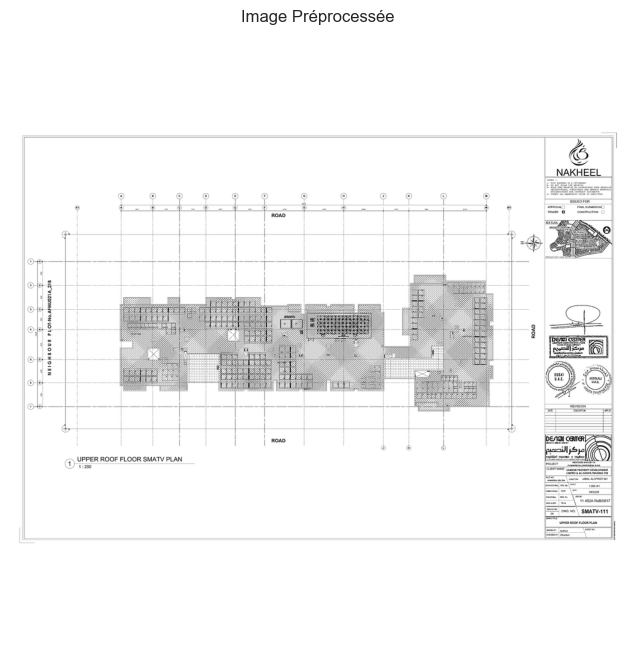

In [5]:
# ============================================================================
# PREPROCESSING IMAGES
# ============================================================================
import numpy as np 
import cv2
from typing import Tuple

class ImagePreprocessor:
    """Préprocesseur d'images pour plans architecturaux"""
    
    def __init__(self, config):
        self.config = config
    
    def detect_orientation(self, image: np.ndarray) -> int:
        """
        Détecte l'orientation de l'image (0, 90, 180, 270 degrés)
        Utilise la détection de texte/contours pour déterminer l'orientation
        """
        # Conversion en niveaux de gris
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) if len(image.shape) == 3 else image
        
        # Détection de contours
        edges = cv2.Canny(gray, 50, 150)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, 
                                minLineLength=50, maxLineGap=10)
        
        if lines is not None and len(lines) > 0:
            angles = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
                angles.append(angle)
            
            # Angle dominant
            angle_hist, _ = np.histogram(angles, bins=36, range=(-90, 90))
            dominant_angle = np.argmax(angle_hist) * 5 - 90
            
            # Normalisation à 0, 90, 180, 270
            if abs(dominant_angle) < 45:
                return 0
            elif 45 <= dominant_angle < 135:
                return 90
            elif -135 <= dominant_angle < -45:
                return -90
            else:
                return 180
        
        return 0
    
    def correct_orientation(self, image: Image.Image) -> Image.Image:
        """Corrige l'orientation de l'image"""
        img_array = np.array(image)
        angle = self.detect_orientation(img_array)
        
        if angle != 0:
            # Rotation
            if angle == 90:
                return image.rotate(-90, expand=True)
            elif angle == -90 or angle == 270:
                return image.rotate(90, expand=True)
            elif angle == 180:
                return image.rotate(180, expand=True)
        
        return image
    
    def binarize_otsu(self, image: np.ndarray) -> np.ndarray:
        """Binarisation avec méthode d'Otsu"""
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        else:
            gray = image.copy()
        
        # Binarisation Otsu
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return binary
    
    def binarize_adaptive(self, image: np.ndarray, block_size: int = 11, 
                         C: int = 2) -> np.ndarray:
        """Binarisation adaptative"""
        if len(image.shape) == 3:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        else:
            gray = image.copy()
        
        binary = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, block_size, C
        )
        return binary
    
    def denoise(self, image: np.ndarray, method: str = 'morphological') -> np.ndarray:
        """
        Dénoisage de l'image
        
        Args:
            image: Image binarisée
            method: 'morphological' ou 'gaussian'
        """
        if method == 'morphological':
            # Opérations morphologiques
            kernel = np.ones((3, 3), np.uint8)
            denoised = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
            denoised = cv2.morphologyEx(denoised, cv2.MORPH_OPEN, kernel)
            return denoised
        
        elif method == 'gaussian':
            # Filtre gaussien (pour images non binarisées)
            return cv2.GaussianBlur(image, (5, 5), 0)
        
        return image
    
    def normalize_size(self, image: Image.Image, target_size: Tuple[int, int] = None) -> Image.Image:
        """Normalise la taille de l'image"""
        if target_size is None:
            target_size = self.config.IMAGE_SIZE
        
        # Resize en conservant le ratio d'aspect
        image.thumbnail(target_size, Image.Resampling.LANCZOS)
        
        # Création d'une nouvelle image avec la taille cible
        new_img = Image.new('RGB', target_size, color='white')
        new_img.paste(image, ((target_size[0] - image.width) // 2,
                             (target_size[1] - image.height) // 2))
        
        return new_img
    
    def correct_perspective(self, image: np.ndarray) -> np.ndarray:
        """Corrige la perspective si le plan est incliné"""
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) if len(image.shape) == 3 else image
        
        # Détection de contours
        edges = cv2.Canny(gray, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if len(contours) > 0:
            # Plus grand contour (probablement le plan)
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Approximation polygonale
            epsilon = 0.02 * cv2.arcLength(largest_contour, True)
            approx = cv2.approxPolyDP(largest_contour, epsilon, True)
            
            if len(approx) == 4:
                # Transformation de perspective
                pts1 = np.float32(approx.reshape(4, 2))
                pts2 = np.float32([[0, 0], [image.shape[1], 0],
                                  [image.shape[1], image.shape[0]], [0, image.shape[0]]])
                
                M = cv2.getPerspectiveTransform(pts1, pts2)
                corrected = cv2.warpPerspective(image, M, (image.shape[1], image.shape[0]))
                return corrected
        
        return image
    
    def preprocess_pipeline(self, image: Image.Image, 
                           steps: List[str] = None) -> Image.Image:
        """
        Pipeline complet de preprocessing
        
        Args:
            image: Image PIL à traiter
            steps: Liste des étapes ['orientation', 'binarize', 'denoise', 'normalize']
        """
        if steps is None:
            steps = ['orientation', 'binarize', 'denoise', 'normalize']
        
        img_array = np.array(image)
        
        # correction orientation
        if 'orientation' in steps:
            image = self.correct_orientation(image)
            img_array = np.array(image)
        
        # Binarisation otsu
        #if 'binarize' in steps:
        #   img_array = self.binarize_otsu(img_array)
        #   # Conversion en RGB pour PIL
        #    img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

        # Binarisation adaptif
        if 'binarize' in steps:
            img_array = self.binarize_adaptive(img_array, block_size=21, C=10)
           # Conversion en RGB pour PIL
            img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        
        # Dénoisage
        if 'denoise' in steps:
            kernel = np.ones((2,2), np.uint8)
            img_array = cv2.morphologyEx(img_array, cv2.MORPH_OPEN, kernel)
        #Conversion finale pour PIL
        if len(img_array.shape) == 2: #Si c'est du Gris/Binaire
            img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
            
        image_final = Image.fromarray(img_array)

        # Normalisation taille
        if 'normalize' in steps:
            image_final = self.normalize_size(image_final)
        
        return image_final

# initialisation
preprocessor = ImagePreprocessor(config)

#fonction helper
def preprocess_image(image_path: str, save_path: str = None) -> Image.Image:
    """Préprocesse une image depuis un fichier"""
    image = Image.open(image_path)
    processed = preprocessor.preprocess_pipeline(image)
    
    if save_path:
        processed.save(save_path)
        print(f"💾 Image préprocessée sauvegardée: {save_path}")
    
    return processed
    
image_path = result['saved_paths'][0]
processed_img = preprocess_image(image_path)
print(" Preprocesseur initialisé!")

#afficher l'image dans le notebook pour un exemple
import matplotlib.pyplot as plt

def show_image(image: Image.Image, title="Image Préprocessée"):
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off') 
    plt.show()

#affichage
show_image(processed_img)




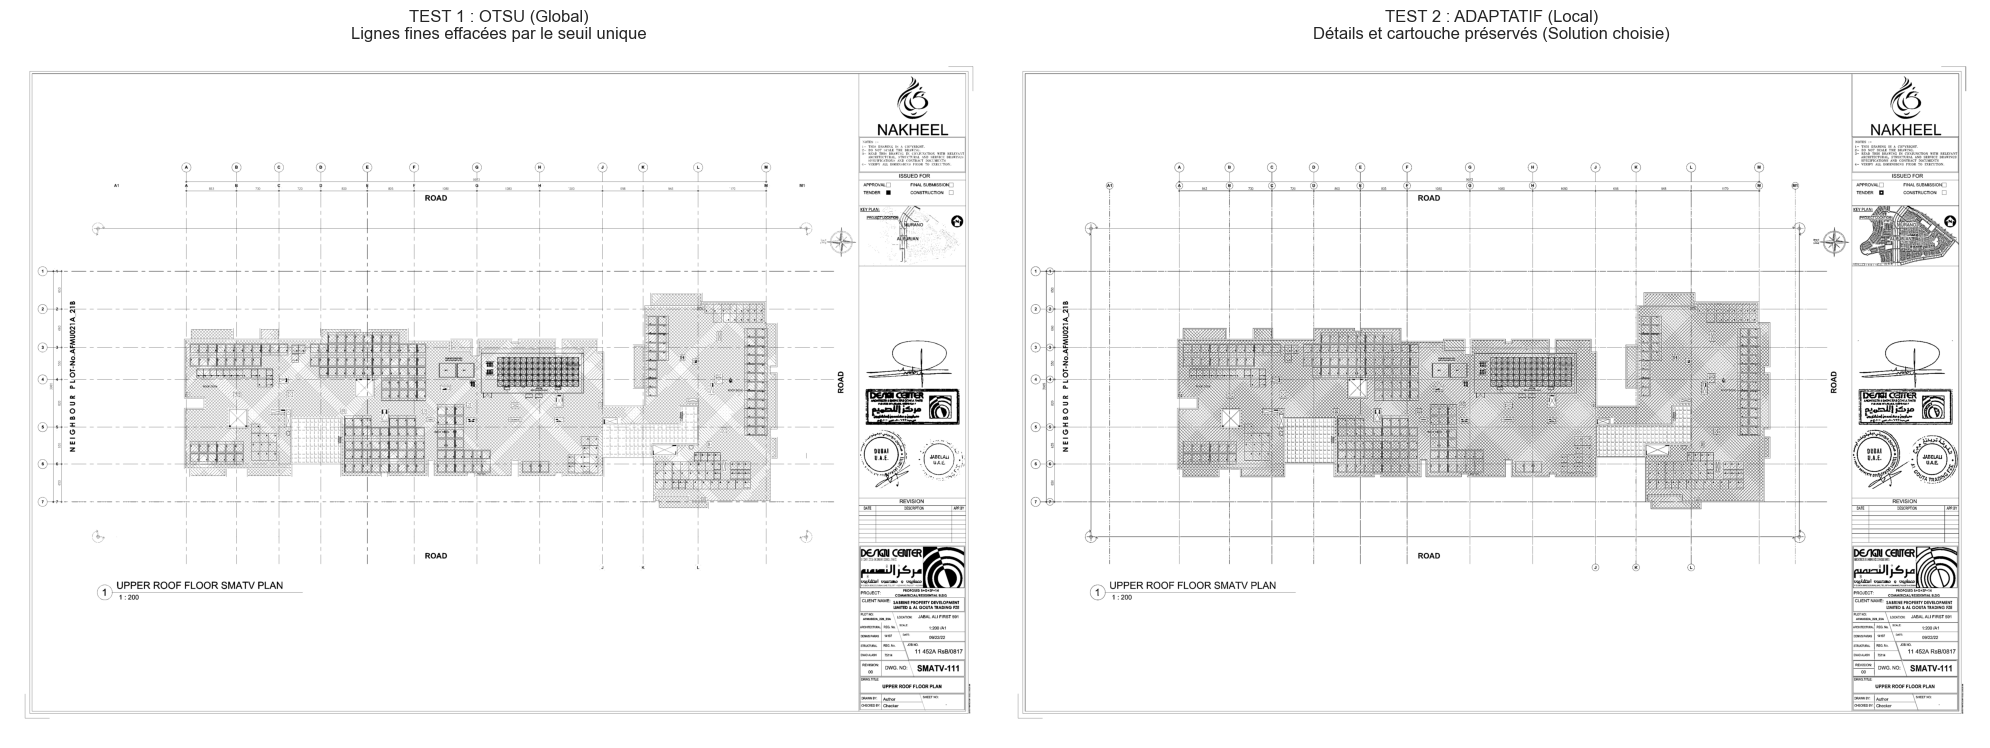

In [6]:

# Test de comparaison  : OTSU (GLOBAL) VS ADAPTATIF (LOCAL)
img_test = np.array(Image.open(image_path))

# Méthode Otsu (Seuil global sur toute l'image)
otsu_res = preprocessor.binarize_otsu(img_test)

#Méthode Adaptative (Seuil calculé par voisinage de pixels)
# C'est la solution retenue pour préserver les détails architecturaux
adapt_res = preprocessor.binarize_adaptive(img_test, block_size=21, C=5)

# affichage comparatif pour démonstration
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(otsu_res, cmap='gray')
axes[0].set_title("TEST 1 : OTSU (Global)\nLignes fines effacées par le seuil unique")
axes[0].axis('off')

axes[1].imshow(adapt_res, cmap='gray')
axes[1].set_title("TEST 2 : ADAPTATIF (Local)\nDétails et cartouche préservés (Solution choisie)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### Après deux comparaison on constate que : 
#### test 1 (Otsu): Seuil global ; risque de supprimer les lignes fines si le contraste est faible.
#### test2 : (Adaptatif) : Seuil local par zone ; conserve les détails techniques et le cartouche.
#### choix final: Choisir la binarisation ADAPTATIVE pour garantir l'intégrité des plans.
#### donc dans preprocess_pipeline on remplace binarize_otsu par binarize_adaptive

In [52]:
# ============================================================================
# GÉNÉRATION DE DONNÉES AVEC LLM
# ============================================================================

import json 
import random
import re
import os
import time
from anthropic import Anthropic
from typing import List, Dict

class LLMDataGenerator:
    """Générateur de données synthétiques avec LLM"""
    
    def __init__(self, config):
        self.config = config
        self.client = None
        api_key = os.getenv("ANTHROPIC_API_KEY")
        if api_key:
            self.client = Anthropic(api_key=api_key)
            print("✅ Client Anthropic initialisé")
    
    def generate_scenarios_prompt(self, num_plans: int = 20) -> str:
        """
        Génère le prompt pour créer des scénarios de plans
        """
        prompt = f"""
        Tu es un expert en architecture. Génère {self.config.NUM_SCENARIOS} scénarios architecturaux en JSON strict.
        
        CONTRAINTES JSON :
        - Commence par '[' et termine par ']'
        - Aucun texte en dehors du JSON
        - Aucun commentaire
        - Aucune virgule finale
        - JSON valide
        
        FORMAT EXACT D'UN SCÉNARIO :
        
        {{
          "scenario_id": "string",
          "type_plan": "string",
          "nombre_pieces": integer,
          "superficie_totale_m2": float,
          "dimensions": {{
            "longueur_m": float,
            "largeur_m": float,
            "hauteur_m": float
          }},
          "elements": [
            {{
              "type": "string",
              "position": [float, float],
              "dimensions": {{
                "longueur_m": float,
                "largeur_m": float
              }},
              "orientation": integer,
              "style": "string"
            }}
          ],
          "pieces": [
            {{
              "nom": "string",
              "superficie_m2": float,
              "position": [float, float],
              "dimensions": {{
                "longueur_m": float,
                "largeur_m": float
              }},
              "elements": ["string"]
            }}
          ],
          "style_architectural": "string",
          "echelle": "string",
          "orientation_batiment": "string"
        }}
        
        RÈGLES :
        Chaque scénario doit absolument contenir le champ obligatoire :
        - "type_batiment": string (choisir parmi : "Maison individuelle", "Appartement", "Bureau", "Local commercial", "Entrepôt industriel", "Équipement public").

         -   Ne jamais laisser le champ vide.
         -  Ne jamais inventer une catégorie hors liste.
         -  Ne pas utiliser de descriptions floues.

        - Les portes sont entre pièces
        - Les fenêtres sur murs extérieurs
        - Les pièces respectent les dimensions globales
        - Le tableau final contient {self.config.NUM_SCENARIOS} scénarios
        Le choix de type_batiment doit être cohérent avec les éléments, les pièces et les dimensions.
        Exemples :
        - Un bureau ne contient pas "Chambre".
        - Un entrepôt n'a pas "Cuisine équipée" sauf mention spéciale.

        
        Génère uniquement le tableau JSON final.
        """



        return prompt
    
    def generate_scenarios_anthropic(self) -> List[Dict]:
        """Génère des scénarios avec Anthropic Claude"""
        if not self.client:
            print("Anthropic non disponible, génération de scénarios mock")
            return self._generate_mock_scenarios()
        
        try:
            prompt = self.generate_scenarios_prompt()
            
            # Déterminer le modèle Anthropic
            model = self.config.LLM_MODEL

            response = self.client.messages.create(
                model=model,
                max_tokens=4096,
                temperature=self.config.LLM_TEMPERATURE,
                system=(
                    "Tu es un validateur JSON strict. "
                    "Tu dois répondre UNIQUEMENT par un tableau JSON valide, sans texte avant ou après, "
                    "Pas de texte avant ou après, pas de commentaires, pas de ```json, juste le JSON brut."
                    "sans commentaires, sans backticks, sans trailing commas. "
                    "Réponds UNIQUEMENT avec un tableau JSON valide. Commence par [ et finis par ]."),
                messages=[
                    {"role": "user", "content": prompt}
                ]
            )

            content = response.content[0].text.strip()

            # DEBUG: Sauvegarder la réponse brute
            debug_path = "raw_anthropic_response.txt"
            with open(debug_path, 'w', encoding='utf-8') as f:
                f.write(content)
            print(f"Réponse brute sauvegardée dans: {debug_path}")
            print(f"Longueur de la réponse: {len(content)} caractères")

            #cNettoyer la réponse
            #étape 1: nettoyer BASIQUE
            content = content.replace("```json", "").replace("```", "").strip()

            # érape2 : chercher le début et la fin du JSON
            start = content.find('[')
            end = content.rfind(']')

            if start == -1 or end == -1:
                print("Pas de JSON trouvé")
                return self._generate_mock_scenarios()

            # etape 3: Extraire le JSON
            json_text = content[start:end+1]

            # etape 4: Reparer l'erreur de la virgule (virgule avant ])
            json_text = json_text.replace(',]', ']')
            json_text = json_text.replace(',}', '}')

            # etape5: Parser DIRECTEMENT
            try:
                scenarios = json.loads(json_text)
                
                #valider qu'on a des scénarios
                if scenarios and isinstance(scenarios, list):
                    timestamp = int(time.time()) # Récupère un nombre unique basé sur l'heure
                    for i, scenario in enumerate(scenarios):
                        # On crée un ID unique type: scen_1704712345_001
                        scenario['scenario_id'] = f"scen_{timestamp}_{i+1:03d}"
                    
                    print(f"{len(scenarios)} scénarios générés avec Anthropic")
                    return scenarios
                    
            except json.JSONDecodeError as e:
                print(f"Erreur JSON: {e}")
                return self._generate_mock_scenarios()
                
        except Exception as e:
            print(f"Erreur génération Anthropic: {e}")
            return self._generate_mock_scenarios()
    
    def generate_scenarios_openai(self) -> List[Dict]:
        """Alias pour compatibilité - utilise Anthropic"""
        return self.generate_scenarios_anthropic()
    
    def _generate_mock_scenarios(self, num: int = None) -> List[Dict]:
        """Génère des scénarios mock pour tests"""
        if num is None:
            num = self.config.NUM_SCENARIOS
        
        import random
        timestamp = int(time.time())
        scenarios = []
        
        types_plans = ["appartement", "maison", "bureau", "commercial"]
        types_elements = ["porte", "fenetre", "mur", "escalier", "colonne", "sanitaire"]
        styles = ["moderne", "classique", "contemporain"]
        
        for i in range(num):
            type_plan = random.choice(types_plans)
            nb_pieces = random.randint(2, 10)
            unique_id = f"mock_{timestamp}_{i+1:03d}"
            
            scenario = {
                "scenario_id": unique_id,
                "type_plan": type_plan,
                "nombre_pieces": nb_pieces,
                "superficie_totale_m2": random.uniform(30, 200),
                "dimensions": {
                    "longueur_m": random.uniform(5, 20),
                    "largeur_m": random.uniform(4, 15)
                },
                "elements": [],
                "pieces": [],
                "style_architectural": random.choice(styles),
                "echelle": random.choice(["1:100", "1:50", "1:200"]),
                "orientation_batiment": random.choice(["nord", "sud", "est", "ouest"])
            }
            
            # Génération éléments
            nb_elements = random.randint(5, 20)
            for j in range(nb_elements):
                elem_type = random.choice(types_elements)
                scenario["elements"].append({
                    "type": elem_type,
                    "position": [
                        random.uniform(0, scenario["dimensions"]["longueur_m"]),
                        random.uniform(0, scenario["dimensions"]["largeur_m"])
                    ],
                    "dimensions": {
                        "longueur_m": random.uniform(0.5, 3.0),
                        "largeur_m": random.uniform(0.5, 2.0)
                    },
                    "orientation": random.choice([0, 90, 180, 270]),
                    "style": random.choice(styles)
                })
            
            scenarios.append(scenario)
        
        print(f"✅ {len(scenarios)} scénarios mock générés")
        return scenarios
    
    def save_scenarios_snowflake(self, scenarios: List[Dict]):
        """Sauvegarde les scénarios dans Snowflake"""
        if not snowflake_connected:
            print("⚠️ Snowflake non disponible, sauvegarde locale")
            scenarios_path = config.DATA_DIR / "scenarios_llm.json"
            with open(scenarios_path, 'w', encoding='utf-8') as f:
                json.dump(scenarios, f, indent=2, ensure_ascii=False)
            print(f"💾 Scénarios sauvegardés: {scenarios_path}")
            return
        
        query = """
        INSERT INTO scenarios_llm 
        (scenario_id, parametres_json, type_plan, nombre_elements)
        SELECT %(id)s, PARSE_JSON(%(json)s), %(type)s, %(nb)s
        """
        
        try:
            for scenario in scenarios:
                params = {
                    "id": scenario["scenario_id"],
                    "json": json.dumps(scenario),
                    "type": scenario["type_plan"],
                    "nb": len(scenario.get("elements", []))
                }
                snowflake_mgr.cursor.execute(query, params)
            
            print(f"{len(scenarios)} scénarios sauvegardés dans Snowflake")
        except Exception as e:
            print(f"Erreur lors de l'insertion Snowflake: {e}")

# Initialisation
llm_generator = LLMDataGenerator(config)

# Génération des scénarios
print("Génération de scénarios avec LLM...")
scenarios = llm_generator.generate_scenarios_openai()

# Sauvegarde
llm_generator.save_scenarios_snowflake(scenarios)

print(f"\n Exemple de scénario généré:")
if scenarios:
    print(json.dumps(scenarios[0], indent=2, ensure_ascii=False))


✅ Client Anthropic initialisé
Génération de scénarios avec LLM...
Réponse brute sauvegardée dans: raw_anthropic_response.txt
Longueur de la réponse: 6194 caractères
5 scénarios générés avec Anthropic
5 scénarios sauvegardés dans Snowflake

 Exemple de scénario généré:
{
  "scenario_id": "scen_1767890855_001",
  "type_plan": "Rez-de-chaussée",
  "nombre_pieces": 5,
  "superficie_totale_m2": 120.5,
  "dimensions": {
    "longueur_m": 15.2,
    "largeur_m": 10.3,
    "hauteur_m": 2.8
  },
  "elements": [
    {
      "type": "Porte d'entrée",
      "position": [
        3.1,
        1.2
      ],
      "dimensions": {
        "longueur_m": 1.0,
        "largeur_m": 2.1
      },
      "orientation": 0,
      "style": "Bois"
    },
    {
      "type": "Fenêtre",
      "position": [
        5.2,
        1.5
      ],
      "dimensions": {
        "longueur_m": 1.5,
        "largeur_m": 1.2
      },
      "orientation": 90,
      "style": "Aluminium"
    }
  ],
  "pieces": [
    {
      "nom": "

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Pipeline Stable Diffusion chargé
🔄 Génération d'images procédurales (mode rapide)...
  ✅ Image générée: scen_1767890855_001
  ✅ Image générée: scen_1767890855_002
  ✅ Image générée: scen_1767890855_003
  ✅ Image générée: scen_1767890855_004
  ✅ Image générée: scen_1767890855_005
✅ 5 images synthétiques générées


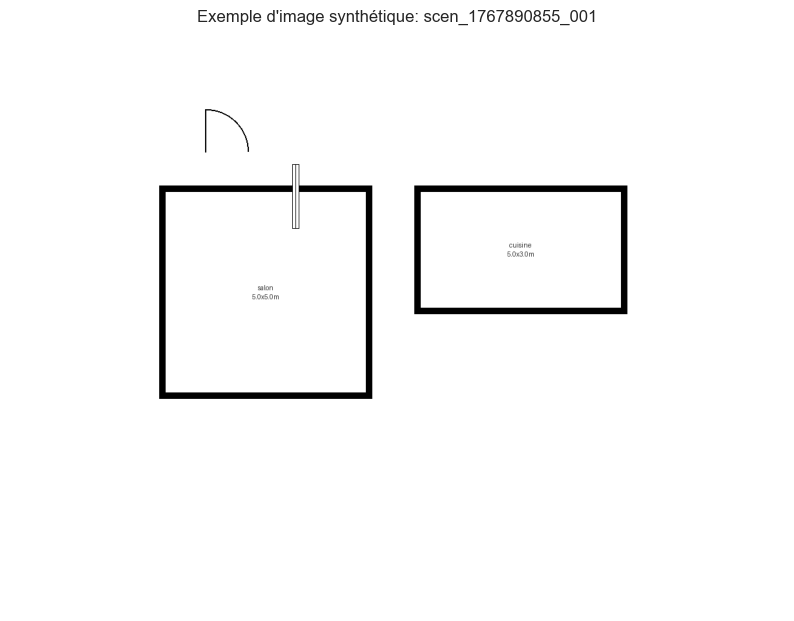

In [61]:
# ============================================================================
# GÉNÉRATION D'IMAGES SYNTHÉTIQUES
# ============================================================================

from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

class SyntheticImageGenerator:
    """Générateur d'images synthétiques de plans avec IA générative"""
    
    def __init__(self, config):
        self.config = config
        self.diffusion_pipeline = None
        
        #Tentative de chargement Stable Diffusion
        try:
            from diffusers import StableDiffusionPipeline
            import torch
            
            if torch.cuda.is_available():
                self.diffusion_pipeline = StableDiffusionPipeline.from_pretrained(
                    "runwayml/stable-diffusion-v1-5",
                    torch_dtype=torch.float16
                ).to("cuda")
            else:
                self.diffusion_pipeline = StableDiffusionPipeline.from_pretrained(
                    "runwayml/stable-diffusion-v1-5"
                )
            print("Pipeline Stable Diffusion chargé")
        except Exception as e:
            print(f"Stable Diffusion non disponible: {e}")
            print("Utilisation de génération procédurale")
    
    def scenario_to_prompt(self, scenario: Dict) -> str:
        """Convertit un scénario JSON en prompt pour génération d'image"""
        type_plan = scenario.get('type_plan', 'appartement')
        style = scenario.get('style_architectural', 'moderne')
        nb_pieces = scenario.get('nombre_pieces', 3)
        
        elements_desc = []
        for elem in scenario.get('elements', [])[:10]:  # Limiter pour le prompt
            elements_desc.append(elem['type'])
        
        prompt = f"""
Architectural floor plan, {type_plan}, {style} style, {nb_pieces} rooms,
elements: {', '.join(set(elements_desc))},
technical drawing, black and white, clean lines, 2D top view,
high quality, detailed, professional architecture blueprint
"""
        return prompt.strip()
    
    def generate_image_stable_diffusion(self, prompt: str, 
                                       num_inference_steps: int = 50) -> Image.Image:
        """Génère une image avec Stable Diffusion"""
        if not self.diffusion_pipeline:
            return self.generate_image_procedural(prompt)
        
        try:
            negative_prompt = "color, 3D, perspective, photo, realistic, messy, low quality"
            
            image = self.diffusion_pipeline(
                prompt=prompt,
                negative_prompt=negative_prompt,
                num_inference_steps=num_inference_steps,
                guidance_scale=7.5,
                height=512,
                width=512
            ).images[0]
            
            return image
        except Exception as e:
            print(f"Erreur génération Stable Diffusion: {e}")
            return self.generate_image_procedural(prompt)
    
    from PIL import Image, ImageDraw, ImageFont
    from PIL import Image, ImageDraw, ImageFont

    def generate_image_procedural(self, scenario: dict) -> Image.Image:
        width, height = 1200, 900
        img = Image.new('RGB', (width, height), color='white')
        draw = ImageDraw.Draw(img)
    
        # Style "Architecte"
        WALL_COLOR = '#000000'
        WALL_WIDTH = 10 
        DOOR_COLOR = '#000000'
        WINDOW_BG = '#FFFFFF' # Indispensable pour "trouer" le mur noir
    
        # Échelle
        plan_w, plan_h = scenario['dimensions']['longueur_m'], scenario['dimensions']['largeur_m']
        margin = 100
        scale = min((width - 2 * margin) / plan_w, (height - 2 * margin) / plan_h)
        off_x, off_y = (width - plan_w * scale) / 2, (height - plan_h * scale) / 2
    
        def m_to_px(pos):
            return (off_x + pos[0] * scale, off_y + pos[1] * scale)
    
        # 1. DESSIN DES PIÈCES (MURS)
        for piece in scenario.get('pieces', []):
            x, y = m_to_px(piece['position'])
            w, h = piece['dimensions']['longueur_m'] * scale, piece['dimensions']['largeur_m'] * scale
            
            draw.rectangle([x, y, x + w, y + h], outline=WALL_COLOR, width=WALL_WIDTH)
            
            # Texte centré
            txt = f"{piece['nom'].lower()}\n{piece['dimensions']['longueur_m']}x{piece['dimensions']['largeur_m']}m"
            draw.multiline_text((x + w/2, y + h/2), txt, fill="#333333", anchor="mm", align="center")
    
        # 2. DESSIN DES ÉLÉMENTS (PORTES/FENÊTRES)
        for elem in scenario.get('elements', []):
            x, y = m_to_px(elem['position'])
            size = elem['dimensions']['longueur_m'] * scale
            etype = elem['type'].lower()
            orient = elem.get('orientation', 0)
    
            # PORTES : On dessine un arc et un battant
            if 'porte' in etype:
                # On efface le segment de mur noir
                if orient == 0:
                    draw.line([x, y, x + size, y], fill='white', width=WALL_WIDTH + 2)
                    draw.line([x, y, x, y - size], fill=DOOR_COLOR, width=2) # Battant
                    draw.arc([x-size, y-size, x+size, y+size], start=270, end=360, fill=DOOR_COLOR, width=2)
                else:
                    draw.line([x, y, x, y + size], fill='white', width=WALL_WIDTH + 2)
                    draw.line([x, y, x + size, y], fill=DOOR_COLOR, width=2) # Battant
                    draw.arc([x-size, y-size, x+size, y+size], start=0, end=90, fill=DOOR_COLOR, width=2)
    
            # FENÊTRES : Un rectangle blanc avec un trait au milieu
            elif 'fenêtre' in etype or 'fenetre' in etype:
                if orient == 0 or orient == 180:
                    rect = [x, y - WALL_WIDTH/2, x + size, y + WALL_WIDTH/2]
                    draw.rectangle(rect, fill=WINDOW_BG, outline=WALL_COLOR, width=1)
                    draw.line([x, y, x + size, y], fill=WALL_COLOR, width=1)
                else:
                    rect = [x - WALL_WIDTH/2, y, x + WALL_WIDTH/2, y + size]
                    draw.rectangle(rect, fill=WINDOW_BG, outline=WALL_COLOR, width=1)
                    draw.line([x, y, x, y + size], fill=WALL_COLOR, width=1)
    
        return img
    
    
        
    def generate_images_from_scenarios(self, scenarios: List[Dict], 
                                      output_dir: Path) -> List[str]:
        """Génère des images pour tous les scénarios"""
        output_dir.mkdir(parents=True, exist_ok=True)
        generated_paths = []
        
        for scenario in scenarios:
            scenario_id = scenario['scenario_id']
            
            # Génération
            if self.diffusion_pipeline:
                prompt = self.scenario_to_prompt(scenario)
                image = self.generate_image_stable_diffusion(prompt)
            else:
                image = self.generate_image_procedural(scenario)
            
            # Sauvegarde
            img_path = output_dir / f"{scenario_id}.png"
            image.save(img_path, "PNG")
            generated_paths.append(str(img_path))
            
            print(f"  ✅ Image générée: {scenario_id}")
        
        print(f"✅ {len(generated_paths)} images synthétiques générées")
        return generated_paths

# Initialisation
image_generator = SyntheticImageGenerator(config)

# forcer la désactivation de diffusion
# En mettant ceci à None, la fonction 'generate_images_from_scenarios' 
# utilisera automatiquement 'generate_image_procedural'
image_generator.diffusion_pipeline = None

# Génération d'images (exemple avec les 5 premiers scénarios)
if scenarios:
    print("🔄 Génération d'images procédurales (mode rapide)...")
    synthetic_images_dir = config.DATA_DIR / "synthetic_images"
    generated_paths = image_generator.generate_images_from_scenarios(
        scenarios[:5],  
        synthetic_images_dir
    )
    
    # Affichage d'un exemple
    if generated_paths:
        example_img = Image.open(generated_paths[0])
        plt.figure(figsize=(10, 10))
        plt.imshow(example_img)
        plt.title(f"Exemple d'image synthétique: {Path(generated_paths[0]).stem}")
        plt.axis('off')
        plt.show()


In [62]:
# 4. Génération de données synthétiques (Section 4)
scenarios = llm_generator.generate_scenarios_openai()
generated_images = image_generator.generate_images_from_scenarios(
    scenarios[:10],  # Limiter pour test
    config.DATA_DIR / "synthetic_images"
)



Réponse brute sauvegardée dans: raw_anthropic_response.txt
Longueur de la réponse: 7728 caractères
5 scénarios générés avec Anthropic
  ✅ Image générée: scen_1767891723_001
  ✅ Image générée: scen_1767891723_002
  ✅ Image générée: scen_1767891723_003
  ✅ Image générée: scen_1767891723_004
  ✅ Image générée: scen_1767891723_005
✅ 5 images synthétiques générées


Affichage des 5 images générées :


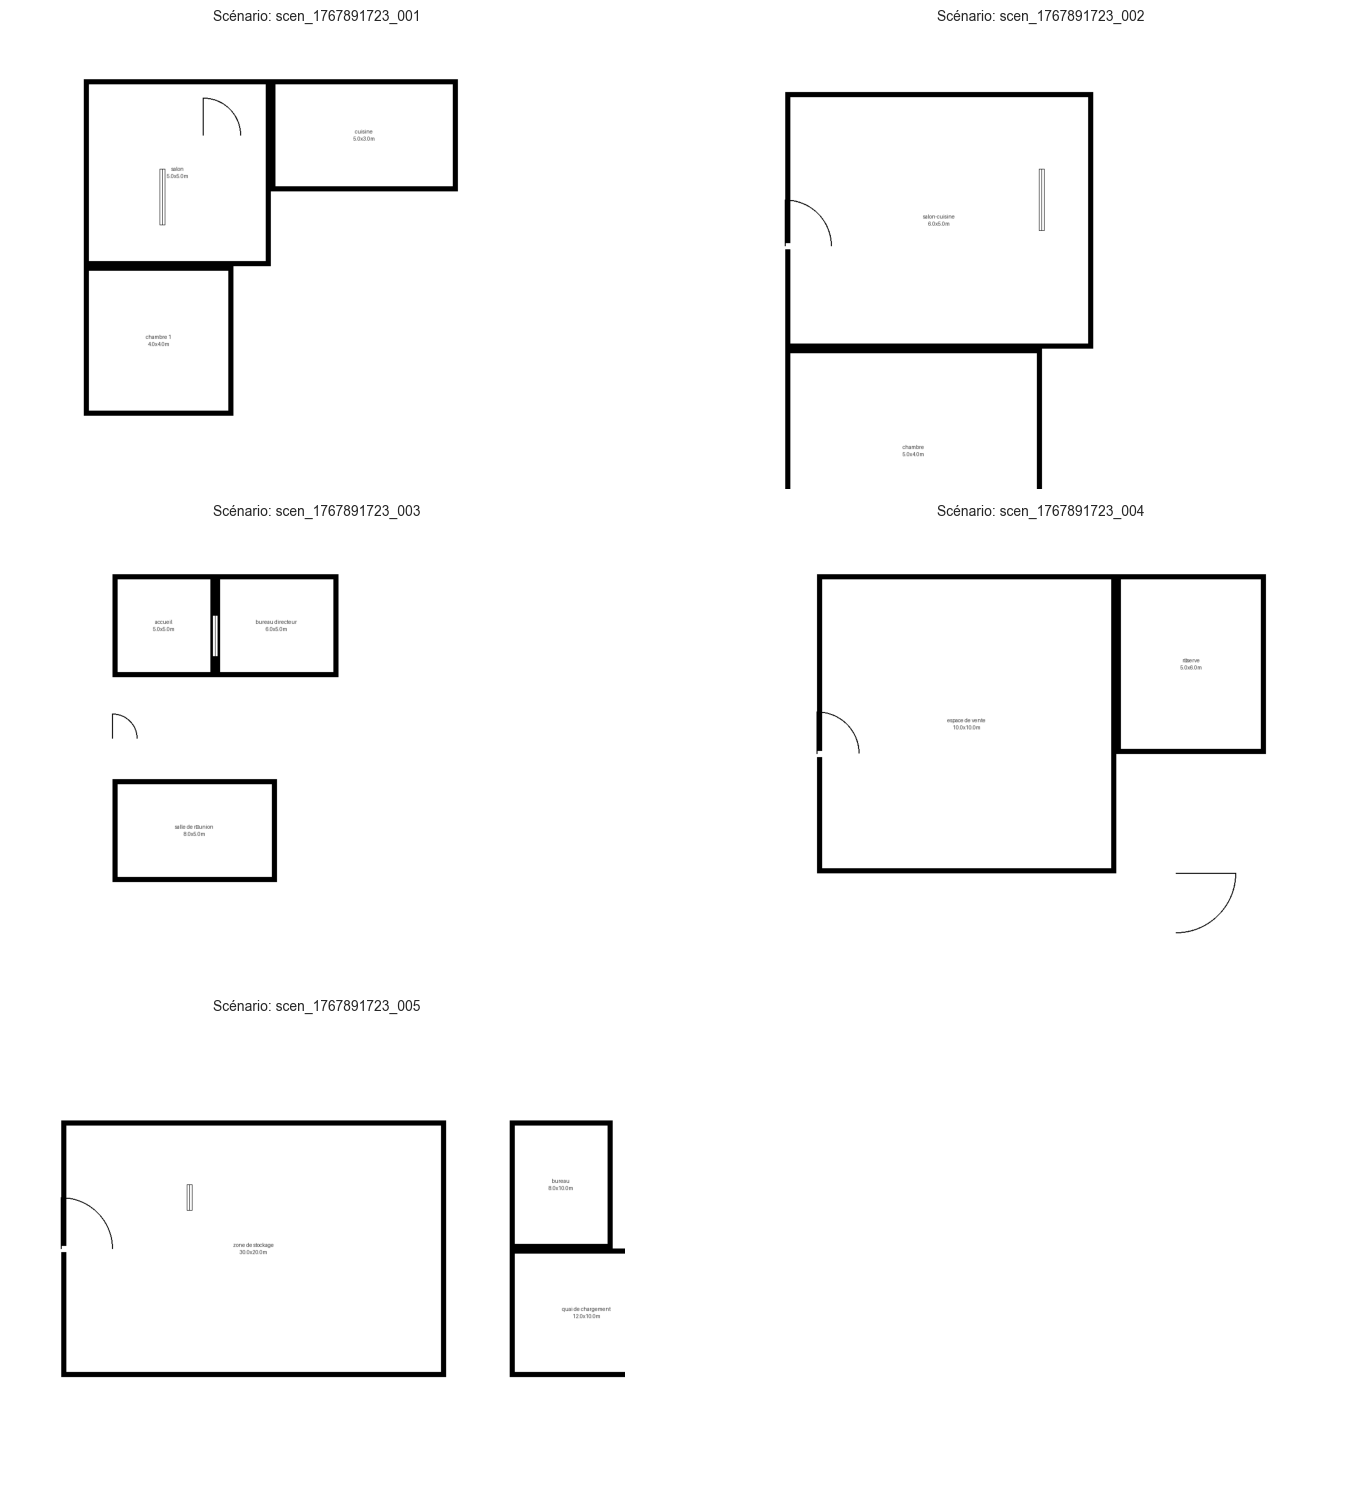

In [63]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

#affichage des résultats
if generated_images:
    print(f"Affichage des {len(generated_images)} images générées :")
    
    # On définit le nombre de colonnes
    cols = 2
    rows = (len(generated_images) + cols - 1) // cols
    
    plt.figure(figsize=(15, 5 * rows))
    
    for i, img_path in enumerate(generated_images):
        plt.subplot(rows, cols, i + 1)
        
        # Charger et afficher l'image
        img = Image.open(img_path)
        plt.imshow(img)
        
        # Titre avec le nom du fichier (ID du scénario)
        plt.title(f"Scénario: {Path(img_path).stem}", fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Aucune image n'a été générée.")


In [64]:
# ============================================================================
# AUGMENTATION DE DONNÉES
# ============================================================================

class DataAugmenter:
    """Augmente les données d'entraînement"""
    
    def __init__(self, config):
        self.config = config
    
    def rotate_image(self, image: Image.Image, angle: int) -> Image.Image:
        """Rotation de l'image"""
        return image.rotate(angle, expand=True, fillcolor='white')
    
    def flip_image(self, image: Image.Image, direction: str = 'horizontal') -> Image.Image:
        """Retournement horizontal ou vertical"""
        if direction == 'horizontal':
            return image.transpose(Image.FLIP_LEFT_RIGHT)
        elif direction == 'vertical':
            return image.transpose(Image.FLIP_TOP_BOTTOM)
        return image
    
    def scale_image(self, image: Image.Image, scale_factor: float) -> Image.Image:
        """Redimensionnement avec facteur d'échelle"""
        new_size = (int(image.width * scale_factor), int(image.height * scale_factor))
        return image.resize(new_size, Image.Resampling.LANCZOS)
    
    def add_noise(self, image: np.ndarray, noise_level: float = 0.1) -> np.ndarray:
        """Ajoute du bruit gaussien"""
        noise = np.random.normal(0, noise_level * 255, image.shape).astype(np.uint8)
        noisy = cv2.add(image.astype(np.uint8), noise)
        return np.clip(noisy, 0, 255)
    
    def adjust_brightness(self, image: Image.Image, factor: float) -> Image.Image:
        """Ajuste la luminosité"""
        from PIL import ImageEnhance
        enhancer = ImageEnhance.Brightness(image)
        return enhancer.enhance(factor)
    
    def augment_image(self, image: Image.Image, 
                     augmentations: List[str] = None) -> List[Image.Image]:
        """
        Applique plusieurs augmentations à une image
        
        Args:
            image: Image à augmenter
            augmentations: Liste des types d'augmentation à appliquer
            
        Returns:
            Liste d'images augmentées
        """
        if augmentations is None:
            augmentations = ['rotate', 'flip', 'scale', 'noise', 'brightness']
        
        augmented_images = []
        img_array = np.array(image)
        
        # Rotations
        if 'rotate' in augmentations:
            for angle in self.config.AUGMENTATION_ROTATIONS:
                rotated = self.rotate_image(image, angle)
                augmented_images.append(rotated)
        
        # Retournements
        if 'flip' in augmentations and self.config.AUGMENTATION_FLIP:
            flipped_h = self.flip_image(image, 'horizontal')
            flipped_v = self.flip_image(image, 'vertical')
            augmented_images.extend([flipped_h, flipped_v])
        
        # Redimensionnements
        if 'scale' in augmentations:
            for scale in self.config.AUGMENTATION_SCALE:
                if scale != 1.0:
                    scaled = self.scale_image(image, scale)
                    # Recadrer à la taille originale
                    scaled = scaled.crop((0, 0, image.width, image.height))
                    augmented_images.append(scaled)
        
        # Bruit
        if 'noise' in augmentations and self.config.AUGMENTATION_NOISE:
            noisy = self.add_noise(img_array, noise_level=0.05)
            augmented_images.append(Image.fromarray(noisy))
        
        # Luminosité
        if 'brightness' in augmentations:
            bright = self.adjust_brightness(image, 1.2)
            dark = self.adjust_brightness(image, 0.8)
            augmented_images.extend([bright, dark])
        
        return augmented_images
    
    def augment_dataset(self, image_paths: List[str], 
                       output_dir: Path, prefix: str = "aug") -> List[str]:
        """
        Augmente un dataset complet
        
        Args:
            image_paths: Liste des chemins d'images
            output_dir: Répertoire de sortie
            prefix: Préfixe pour les images augmentées
            
        Returns:
            Liste des chemins des images augmentées
        """
        output_dir.mkdir(parents=True, exist_ok=True)
        augmented_paths = []
        
        for img_path in image_paths:
            image = Image.open(img_path)
            base_name = Path(img_path).stem
            
            # Augmentations
            augmented = self.augment_image(image)
            
            # Sauvegarde
            for idx, aug_img in enumerate(augmented):
                aug_path = output_dir / f"{prefix}_{base_name}_{idx:03d}.png"
                aug_img.save(aug_path, "PNG")
                augmented_paths.append(str(aug_path))
            
            print(f"  ✅ {len(augmented)} augmentations pour {base_name}")
        
        print(f"✅ {len(augmented_paths)} images augmentées générées")
        return augmented_paths

# Initialisation
augmenter = DataAugmenter(config)

print("📝 Pour augmenter vos images:")
print("augmented_paths = augmenter.augment_dataset(image_paths, output_dir)")
augmented = augmenter.augment_dataset(
    result['saved_paths'],
    config.DATA_DIR / "augmented"
)



📝 Pour augmenter vos images:
augmented_paths = augmenter.augment_dataset(image_paths, output_dir)
  ✅ 10 augmentations pour SMATV-111-UPPER ROOF FLOOR PLAN_page_001
✅ 10 images augmentées générées


Affichage des résultats d'augmentation (10 images générées) :


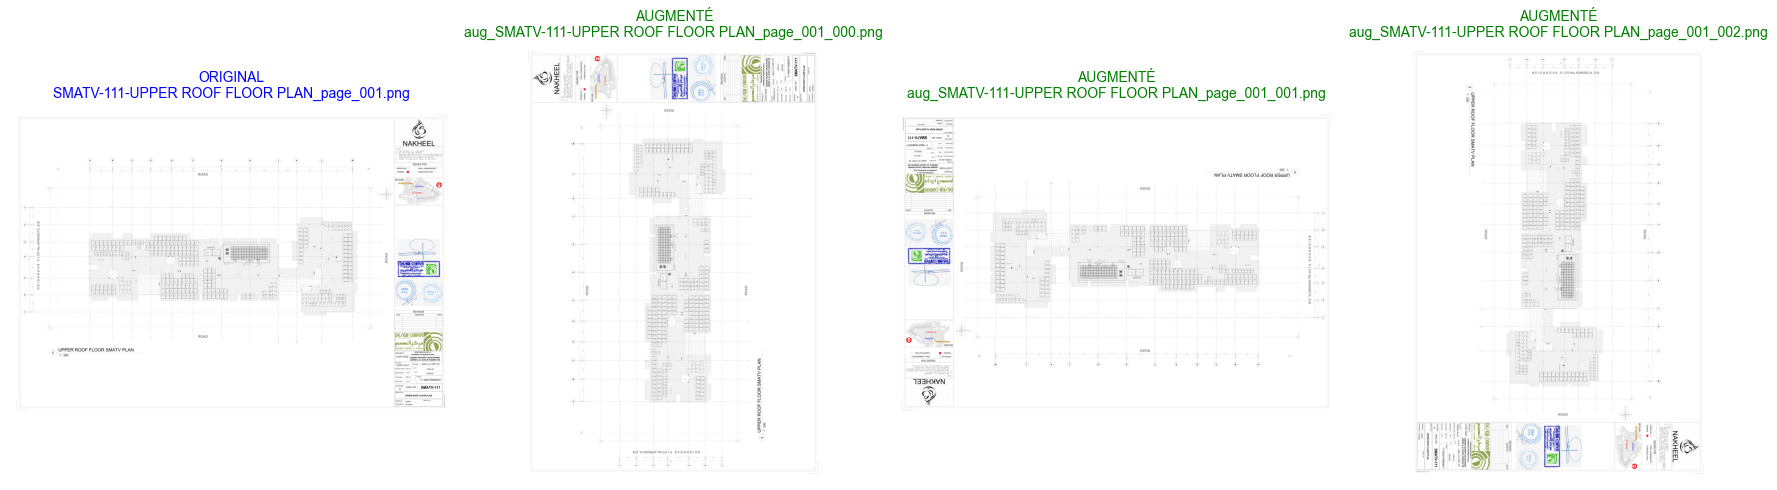

In [65]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

# On récupère les images originales et augmentées
original_paths = result['saved_paths']
# On filtre les images augmentées pour n'afficher que celles liées aux premières originales


if augmented:
    print(f"Affichage des résultats d'augmentation ({len(augmented)} images générées) :")
    
    num_originals = min(3, len(original_paths))  # On prend 3 exemples max
    
    for i in range(num_originals):
        orig_path = Path(original_paths[i])
        # On cherche les versions augmentées de cette image spécifique
        related_aug = [p for p in augmented if orig_path.stem in Path(p).stem][:3]
        
        # Création de la ligne d'affichage : Originale + ses augmentations
        n_imgs = 1 + len(related_aug)
        fig, axes = plt.subplots(1, n_imgs, figsize=(18, 5))
        
        # 1. Affichage de l'originale
        axes[0].imshow(Image.open(orig_path))
        axes[0].set_title(f"ORIGINAL\n{orig_path.name}", fontsize=10, color='blue')
        axes[0].axis('off')
        
        # 2. Affichage des versions augmentées
        for j, aug_path in enumerate(related_aug):
            axes[j+1].imshow(Image.open(aug_path))
            axes[j+1].set_title(f"AUGMENTÉ\n{Path(aug_path).name}", fontsize=10, color='green')
            axes[j+1].axis('off')
            
        plt.tight_layout()
        plt.show()
else:
    print("Aucune image augmentée trouvée.")

In [66]:
# ============================================================================
# LABELLISATION AUTOMATIQUE AVEC YOLO
# ============================================================================
#
#  IMPORTANT: YOLO pré-entraîné détecte des objets génériques (COCO dataset)
#    - Classes détectées: person, car, bicycle, chair, etc. (80 classes COCO)
#    - PAS d'éléments architecturaux spécifiques (porte, fenêtre, mur, etc.)
#
# Pour détecter des éléments architecturaux:
#    1. Fine-tuner YOLO sur un dataset de plans architecturaux (Section 6)
#    2. Utiliser un modèle pré-entraîné spécialisé en architecture
#    3. Utiliser un modèle de segmentation sémantique spécialisé
#
# Le code ci-dessous utilise les noms de classes réels de YOLO (result.names)
# au lieu de config.CLASSES qui est pour un modèle fine-tuné.
# ============================================================================

class YOLOLabeler:
    """Labellisateur automatique avec YOLO pré-entraîné"""
    
    def __init__(self, config):
        self.config = config
        self.model_detection = None
        self.model_segmentation = None
        self.model_keypoints = None
        
        self._load_models()
    
    def _load_models(self):
        """Charge les modèles YOLO pré-entraînés"""
        try:
            # Modèle détection
            self.model_detection = YOLO(self.config.YOLO_MODEL_DETECTION)
            print(f" Modèle détection chargé: {self.config.YOLO_MODEL_DETECTION}")
            
            # Modèle segmentation
            self.model_segmentation = YOLO(self.config.YOLO_MODEL_SEGMENTATION)
            print(f" Modèle segmentation chargé: {self.config.YOLO_MODEL_SEGMENTATION}")
            
            # Modèle keypoints
            self.model_keypoints = YOLO(self.config.YOLO_MODEL_KEYPOINTS)
            print(f" Modèle keypoints chargé: {self.config.YOLO_MODEL_KEYPOINTS}")
        
        except Exception as e:
            print(f" Erreur chargement modèles YOLO: {e}")
            print(" Téléchargez les modèles depuis: https://github.com/ultralytics/ultralytics")
    
    def predict_detection(self, image_path: str) -> List[Dict]:
        """
        Prédit les détections sur une image
        
        Returns:
            Liste de détections avec bbox, confidence, classe
        """
        if not self.model_detection:
            return []
        
        try:
            results = self.model_detection.predict(
                image_path,
                imgsz=self.config.YOLO_IMG_SIZE,
                conf=self.config.YOLO_CONF_THRESHOLD,
                iou=self.config.YOLO_IOU_THRESHOLD,
                verbose=False
            )
            
            detections = []
            for result in results:
                boxes = result.boxes
                # Utiliser les noms de classes réels de YOLO (COCO dataset)
                # YOLO détecte des objets génériques, pas des éléments architecturaux spécifiques
                # Pour détecter des éléments architecturaux, il faudrait un modèle fine-tuné
                for box in boxes:
                    # Coordonnées normalisées YOLO (x_center, y_center, width, height)
                    x_center, y_center, width, height = box.xywhn[0].cpu().numpy()
                    conf = float(box.conf[0].cpu().numpy())
                    cls = int(box.cls[0].cpu().numpy())
                    
                    # Utiliser les noms de classes réels de YOLO (result.names)
                    # Au lieu de config.CLASSES qui est pour un modèle fine-tuné
                    class_name = result.names[cls] if hasattr(result, 'names') and cls in result.names else f"class_{cls}"
                    
                    detections.append({
                        'class': cls,
                        'class_name': class_name,
                        'confidence': conf,
                        'bbox': {
                            'x_center': float(x_center),
                            'y_center': float(y_center),
                            'width': float(width),
                            'height': float(height)
                        }
                    })
            
            return detections
            
        except Exception as e:
            print(f" Erreur prédiction détection: {e}")
            return []
    
    def predict_segmentation(self, image_path: str) -> List[Dict]:
        """Prédit la segmentation sémantique"""
        if not self.model_segmentation:
            return []
        
        try:
            results = self.model_segmentation.predict(
                image_path,
                imgsz=self.config.YOLO_IMG_SIZE,
                conf=self.config.YOLO_CONF_THRESHOLD,
                verbose=False
            )
            
            segmentations = []
            for result in results:
                if result.masks is not None:
                    for mask, box in zip(result.masks, result.boxes):
                        # Points de segmentation
                        seg_points = mask.xy[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())
                        conf = float(box.conf[0].cpu().numpy())
                        
                        # Utiliser les noms de classes réels de YOLO
                        class_name = result.names[cls] if hasattr(result, 'names') and cls in result.names else f"class_{cls}"
                        segmentations.append({
                            'class': cls,
                            'class_name': class_name,
                            'confidence': conf,
                            'segmentation_points': seg_points.tolist()
                        })
            
            return segmentations
            
        except Exception as e:
            print(f" Erreur prédiction segmentation: {e}")
            return []
    
    def predict_keypoints(self, image_path: str) -> List[Dict]:
        """Prédit les keypoints"""
        if not self.model_keypoints:
            return []
        
        try:
            results = self.model_keypoints.predict(
                image_path,
                imgsz=self.config.YOLO_IMG_SIZE,
                conf=self.config.YOLO_CONF_THRESHOLD,
                verbose=False
            )
            
            keypoints_list = []
            for result in results:
                if result.keypoints is not None:
                    for kpts, box in zip(result.keypoints, result.boxes):
                        kpts_array = kpts.xy[0].cpu().numpy()
                        cls = int(box.cls[0].cpu().numpy())
                        conf = float(box.conf[0].cpu().numpy())
                        
                        keypoints_list.append({
                            'class': cls,
                            'confidence': conf,
                            'keypoints': kpts_array.tolist()
                        })
            
            return keypoints_list
            
        except Exception as e:
            print(f" Erreur prédiction keypoints: {e}")
            return []
    
    def export_yolo_format(self, detections: List[Dict], 
                          image_path: str, output_dir: Path) -> str:
        """
        Exporte les annotations au format YOLO
        
        Format YOLO: class_id x_center y_center width height (toutes valeurs normalisées 0-1)
        """
        output_dir.mkdir(parents=True, exist_ok=True)
        
        # Fichier .txt avec le même nom que l'image
        txt_path = output_dir / f"{Path(image_path).stem}.txt"
        
        with open(txt_path, 'w') as f:
            for det in detections:
                bbox = det['bbox']
                line = f"{det['class']} {bbox['x_center']} {bbox['y_center']} {bbox['width']} {bbox['height']}\n"
                f.write(line)
        
        return str(txt_path)
    
    def label_image(self, image_path: str, save_annotations: bool = True) -> Dict:
        """
        Labellise complètement une image (détection + segmentation + keypoints)
        
        Returns:
            Dictionnaire avec toutes les annotations
        """
        detections = self.predict_detection(image_path)
        segmentations = self.predict_segmentation(image_path)
        keypoints = self.predict_keypoints(image_path)
        
        annotations = {
            'image_path': image_path,
            'detections': detections,
            'segmentations': segmentations,
            'keypoints': keypoints,
            'num_detections': len(detections)
        }
        
        # Export format YOLO
        if save_annotations and detections:
            self.export_yolo_format(
                detections, 
                image_path, 
                config.ANNOTATIONS_DIR
            )
        
        return annotations
    
    def visualize_annotations(self, image_path: str, annotations: Dict) -> Image.Image:
        """Visualise les annotations sur l'image"""
        image = Image.open(image_path)
        img_array = np.array(image)
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        ax.imshow(img_array)
        
        # Dessin des bboxes
        for det in annotations['detections']:
            bbox = det['bbox']
            img_h, img_w = img_array.shape[:2]
            
            # Conversion coordonnées normalisées → pixels
            x_center = bbox['x_center'] * img_w
            y_center = bbox['y_center'] * img_h
            width = bbox['width'] * img_w
            height = bbox['height'] * img_h
            
            x1 = x_center - width / 2
            y1 = y_center - height / 2
            
            rect = patches.Rectangle(
                (x1, y1), width, height,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)
            
            # Label
            ax.text(x1, y1 - 5, 
                   f"{det['class_name']} {det['confidence']:.2f}",
                   color='red', fontsize=10, weight='bold')
        
        ax.set_title(f"Annotations - {Path(image_path).name}")
        ax.axis('off')
        plt.tight_layout()
        return fig

# Initialisation
labeler = YOLOLabeler(config)

print(" Labellisateur YOLO initialisé!")
print(f" Pour labelliser une image: annotations = labeler.label_image('path/to/image.png')")



 Modèle détection chargé: yolo11n.pt
 Modèle segmentation chargé: yolo11n-seg.pt
 Modèle keypoints chargé: yolo11n-pose.pt
 Labellisateur YOLO initialisé!
 Pour labelliser une image: annotations = labeler.label_image('path/to/image.png')


In [69]:
annotations = labeler.label_image('data/synthetic_images/scen_1767891723_001.png')

Nombre de détections: 1
  - kite: confiance 0.74


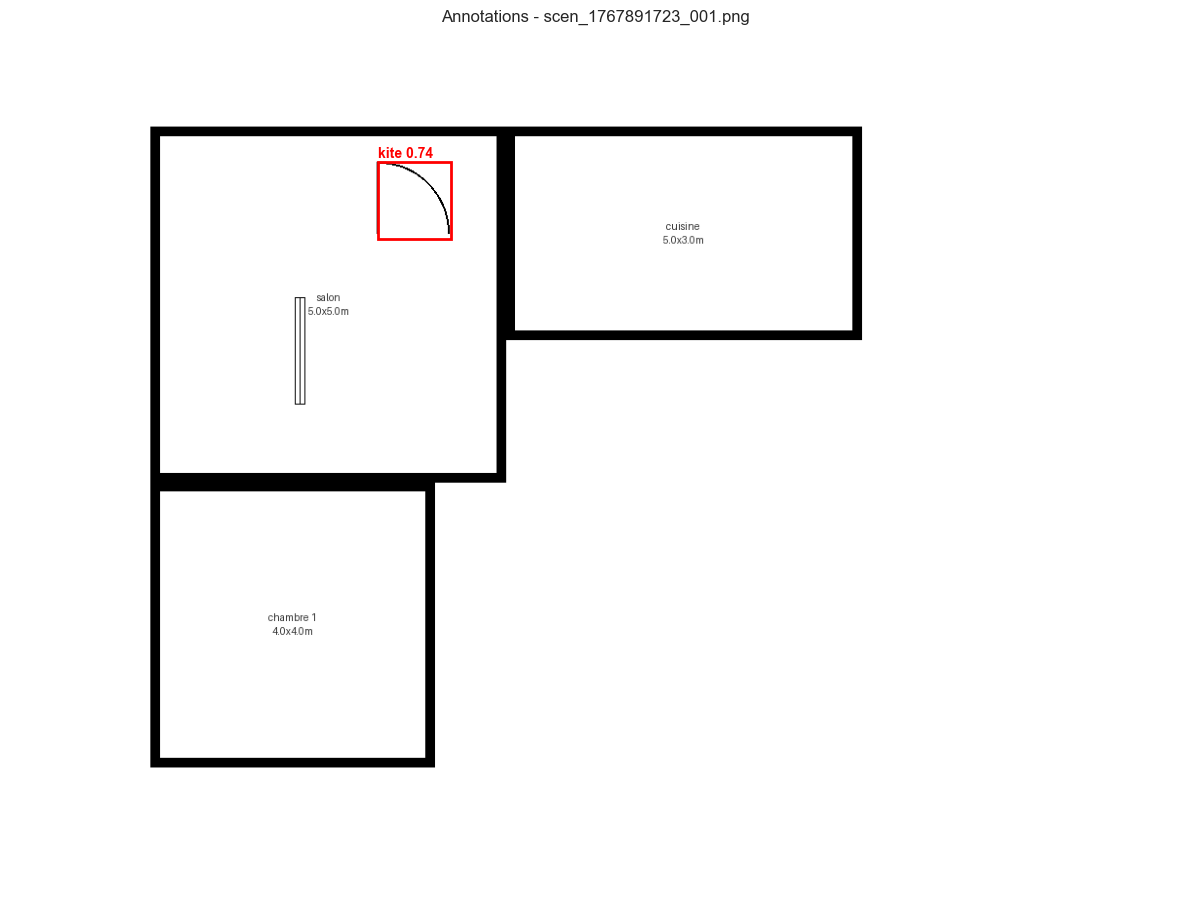

In [71]:
# 7. Entraînement YOLO (Section 6)

# a. Détection Simple (YOLO Pré-entraîné)
# Charger une image
image_path = "data/synthetic_images/scen_1767891723_001.png"

# Détection
annotations = labeler.label_image(image_path)

# Afficher les résultats
print(f"Nombre de détections: {len(annotations['detections'])}")
for det in annotations['detections']:
    print(f"  - {det['class_name']}: confiance {det['confidence']:.2f}")

# Visualiser
fig = labeler.visualize_annotations(image_path, annotations)
plt.show()


In [72]:
# b. Détection Complète (Détection + Segmentation + Keypoints)
# Détection
detections = labeler.predict_detection(image_path)

# Segmentation
segmentations = labeler.predict_segmentation(image_path)

# Keypoints
keypoints = labeler.predict_keypoints(image_path)

# Combiner
full_annotations = {
    'detections': detections,
    'segmentations': segmentations,
    'keypoints': keypoints
}




In [73]:
# ============================================================================
# STOCKAGE ANNOTATIONS SNOWFLAKE
# ============================================================================

def save_annotations_snowflake(plan_id: str, annotations: Dict):
    """Sauvegarde les annotations dans Snowflake"""
    if not snowflake_connected:
        print(" Snowflake non disponible, sauvegarde locale")
        # Sauvegarde locale JSON
        json_path = config.ANNOTATIONS_DIR / f"{plan_id}_annotations.json"
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(annotations, f, indent=2, ensure_ascii=False)
        print(f" Annotations sauvegardées: {json_path}")
        return
    
    # Insertion des détections
    for det in annotations['detections']:
        query = f"""
        INSERT INTO annotations 
        (id, plan_id, classe, bbox_x, bbox_y, bbox_width, bbox_height, confidence)
        VALUES (
            '{plan_id}_det_{len(annotations['detections'])}',
            '{plan_id}',
            '{det['class_name']}',
            {det['bbox']['x_center']},
            {det['bbox']['y_center']},
            {det['bbox']['width']},
            {det['bbox']['height']},
            {det['confidence']}
        )
        """
        snowflake_mgr.execute_query(query, fetch=False)
    
    # Insertion des segmentations
    for seg in annotations['segmentations']:
        query = f"""
        INSERT INTO annotations 
        (id, plan_id, classe, segmentation_points, confidence)
        VALUES (
            '{plan_id}_seg_{len(annotations['segmentations'])}',
            '{plan_id}',
            '{seg['class_name']}',
            PARSE_JSON('{json.dumps(seg['segmentation_points'])}'),
            {seg['confidence']}
        )
        """
        snowflake_mgr.execute_query(query, fetch=False)
    
    print(f"{len(annotations['detections'])} annotations sauvegardées dans Snowflake")

# Exemple d'utilisation
print(" Fonction de sauvegarde annotations prête")
print(" Utilisation: save_annotations_snowflake(plan_id, annotations)")


 Fonction de sauvegarde annotations prête
 Utilisation: save_annotations_snowflake(plan_id, annotations)


In [74]:
# Sauvegarder
save_annotations_snowflake("scen_1767891723_001", full_annotations)

1 annotations sauvegardées dans Snowflake


# Section 6: Entraînement YOLO

## 6.1 Préparation du dataset (train/val/test)


# Section 10: Exemples d'Utilisation Pratique

## 🎯 Exemples pour Démarrer Rapidement

Cette section contient des exemples prêts à l'emploi pour utiliser le projet.


## 10.1 Exemple Minimal: Traiter un PDF et Détecter les Éléments


 TRAITEMENT COMPLET D'UN PDF

 Étape 1: Extraction des pages PDF...
PDF ouvert: 1 pages
 Page 1 extraite: (4768, 3368)
  Image sauvegardée: ACC-110-LOWER ROOF FLOOR PLAN_page_001.png
Métadonnées insérées pour ACC-110-LOWER ROOF FLOOR PLAN.pdf
 1 pages extraites

 Étape 2: Preprocessing de la première page...
💾 Image préprocessée sauvegardée: data\images\processed_ACC-110-LOWER ROOF FLOOR PLAN_page_001.png
 Image préprocessée

 Étape 3: Détection des éléments architecturaux...
 0 éléments détectés:

 Étape 4: Visualisation des résultats...


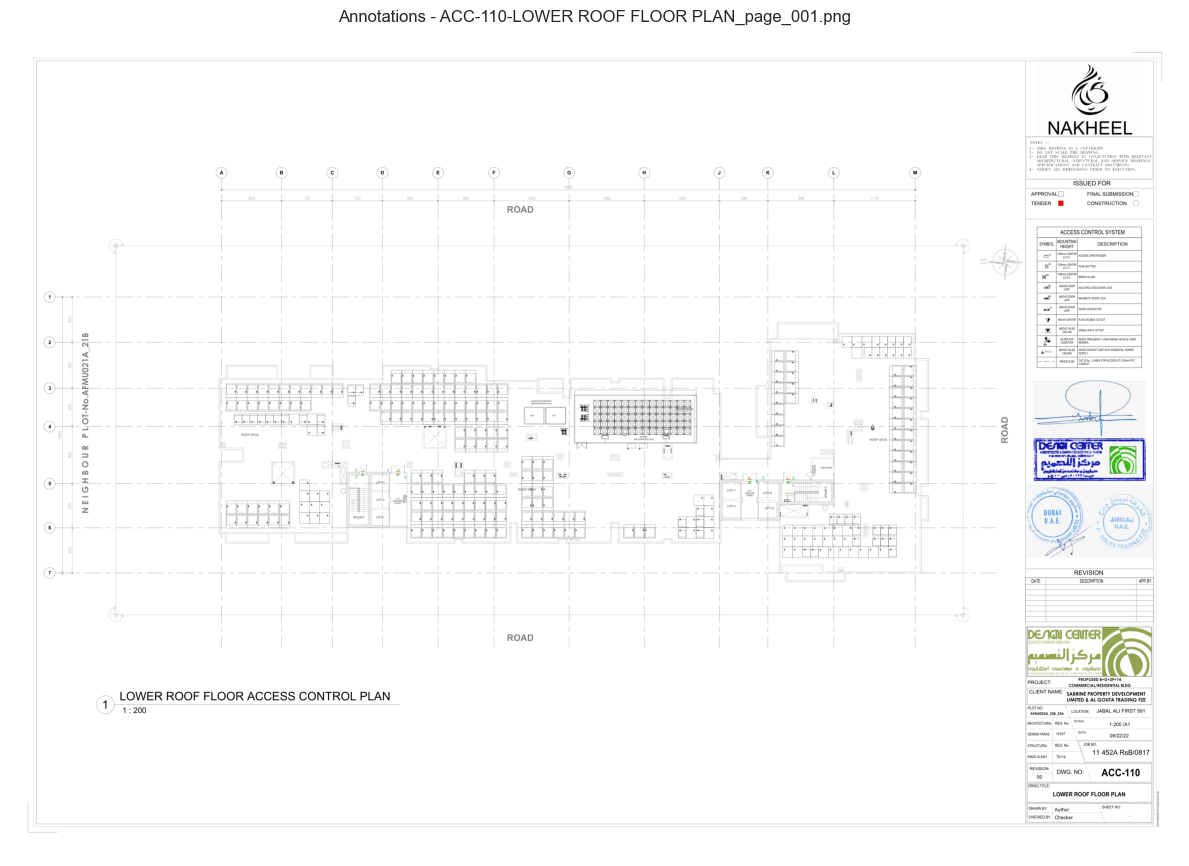


 Étape 5: Sauvegarde dans Snowflake...
0 annotations sauvegardées dans Snowflake

 TRAITEMENT TERMINÉ AVEC SUCCÈS!


In [75]:
# ============================================================================
# EXEMPLE 1: TRAITEMENT COMPLET D'UN PDF
# ============================================================================

def exemple_traitement_pdf_complet(pdf_path: str):
    """
    Exemple complet: Extraction → Preprocessing → Détection → Visualisation
    
    Usage:
        exemple_traitement_pdf_complet("data/pdfs/ACC-110-LOWER ROOF FLOOR PLAN.pdf")
    """
    print("=" * 60)
    print(" TRAITEMENT COMPLET D'UN PDF")
    print("=" * 60)
    
    # Étape 1: Extraction PDF → Images
    print("\n Étape 1: Extraction des pages PDF...")
    result = process_pdf(pdf_path)
    
    if not result:
        print(" Erreur lors de l'extraction")
        return None
    
    print(f" {len(result['images'])} pages extraites")
    
    # Étape 2: Preprocessing (première page)
    print("\n Étape 2: Preprocessing de la première page...")
    first_image_path = result['saved_paths'][0]
    processed_img = preprocess_image(
        first_image_path,
        save_path=str(config.IMAGES_DIR / f"processed_{Path(first_image_path).name}")
    )
    print(" Image préprocessée")
    
    # Étape 3: Détection avec YOLO
    print("\n Étape 3: Détection des éléments architecturaux...")
    annotations = labeler.label_image(first_image_path)
    
    print(f" {len(annotations['detections'])} éléments détectés:")
    for det in annotations['detections']:
        print(f"   - {det['class_name']}: confiance {det['confidence']:.2%}")
    
    # Étape 4: Visualisation
    print("\n Étape 4: Visualisation des résultats...")
    fig = labeler.visualize_annotations(first_image_path, annotations)
    plt.show()
    
    # Étape 5: Sauvegarde (optionnel)
    if snowflake_connected:
        print("\n Étape 5: Sauvegarde dans Snowflake...")
        save_annotations_snowflake(result['plan_data']['id'], annotations)
    
    print("\n" + "=" * 60)
    print(" TRAITEMENT TERMINÉ AVEC SUCCÈS!")
    print("=" * 60)
    
    return {
        'result': result,
        'annotations': annotations,
        'processed_image': processed_img
    }

# DÉCOMMENTER POUR UTILISER:
resultat = exemple_traitement_pdf_complet("data/pdfs/ACC-110-LOWER ROOF FLOOR PLAN.pdf")


## 10.2 Exemple: Traitement de Tous les PDFs d'un Dossier


In [78]:
# ============================================================================
# EXEMPLE 2: TRAITEMENT BATCH DE PLUSIEURS PDFs
# ============================================================================

def exemple_traitement_batch(pdf_directory: str = "data/pdfs"):
    """
    Traite tous les PDFs d'un répertoire
    
    Usage:
        exemple_traitement_batch("data/pdfs")
    """
    pdf_dir = Path(pdf_directory)
    pdf_files = list(pdf_dir.glob("*.pdf"))
    
    if not pdf_files:
        print(f" Aucun PDF trouvé dans {pdf_directory}")
        return []
    
    print(f" {len(pdf_files)} PDFs trouvés")
    print("=" * 60)
    
    results = []
    
    for idx, pdf_path in enumerate(pdf_files, 1):
        print(f"\n [{idx}/{len(pdf_files)}] Traitement: {pdf_path.name}")
        print("-" * 60)
        
        try:
            # Extraction
            result = process_pdf(str(pdf_path))
            
            if result:
                # Détection sur première page de chaque PDF
                if result['saved_paths']:
                    annotations = labeler.label_image(result['saved_paths'][0])
                    result['annotations'] = annotations
                    results.append(result)
                    
                    print(f"   {len(annotations['detections'])} détections")
                else:
                    print("   Aucune image extraite")
            else:
                print("   Erreur lors du traitement")
                
        except Exception as e:
            print(f"   Erreur: {e}")
    
    print("\n" + "=" * 60)
    print(f" TRAITEMENT BATCH TERMINÉ: {len(results)}/{len(pdf_files)} PDFs traités")
    print("=" * 60)
    
    # Statistiques globales
    total_detections = sum(len(r.get('annotations', {}).get('detections', [])) for r in results)
    print(f"\n Statistiques globales:")
    print(f"   - Total détections: {total_detections}")
    print(f"   - Moyenne par PDF: {total_detections/len(results) if results else 0:.1f}")
    
    return results


tous_les_resultats = exemple_traitement_batch()


 21 PDFs trouvés

 [1/21] Traitement: ACC-107-SECOND FLOOR PLAN.pdf
------------------------------------------------------------
PDF ouvert: 1 pages
 Page 1 extraite: (4768, 3368)
  Image sauvegardée: ACC-107-SECOND FLOOR PLAN_page_001.png
Métadonnées insérées pour ACC-107-SECOND FLOOR PLAN.pdf
   0 détections

 [2/21] Traitement: ACC-108-TYPICAL 3rd-8th FLOOR PLAN.pdf
------------------------------------------------------------
PDF ouvert: 1 pages
 Page 1 extraite: (4768, 3368)
  Image sauvegardée: ACC-108-TYPICAL 3rd-8th FLOOR PLAN_page_001.png
Métadonnées insérées pour ACC-108-TYPICAL 3rd-8th FLOOR PLAN.pdf
   0 détections

 [3/21] Traitement: ACC-109-TYPICAL 9th-14th FLOOR PLAN.pdf
------------------------------------------------------------
PDF ouvert: 1 pages
 Page 1 extraite: (4768, 3368)
  Image sauvegardée: ACC-109-TYPICAL 9th-14th FLOOR PLAN_page_001.png
Métadonnées insérées pour ACC-109-TYPICAL 9th-14th FLOOR PLAN.pdf
   0 détections

 [4/21] Traitement: ACC-110-LOWER ROOF F

## 10.3 Exemple: Détection et Export Vectoriel


 DÉTECTION ET EXPORT DXF

 Détection des éléments...
    1 détections
    0 segmentations
    0 keypoints

 Export en format DXF...
   Fichier sauvegardé: output\ELECTRICAL ROOM-LV & ELECTRICAL ROOM DETAILS (1)_page_001.dxf

 Visualisation...


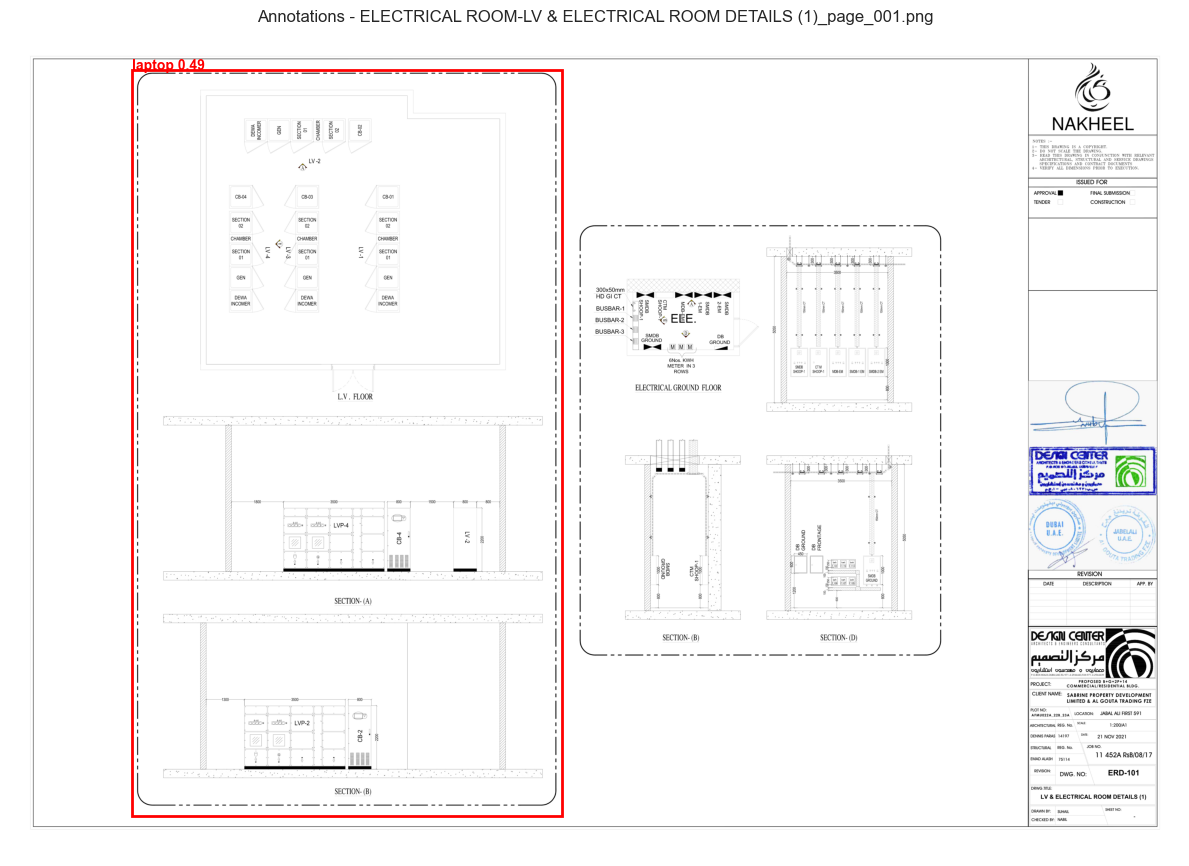


 EXPORT TERMINÉ!


In [79]:
# ============================================================================
# EXEMPLE 3: DÉTECTION + EXPORT VECTORIEL
# ============================================================================

def exemple_detection_et_export(image_path: str, output_format: str = "dxf"):
    """
    Détecte les éléments et exporte en format vectoriel
    
    Args:
        image_path: Chemin vers l'image du plan
        output_format: "dxf" ou "ifc"
    
    Usage:
        exemple_detection_et_export("data/images/ELECTRICAL ROOM-LV & ELECTRICAL ROOM DETAILS (1)_page_001.png", "dxf")
    """
    print("=" * 60)
    print(f" DÉTECTION ET EXPORT {output_format.upper()}")
    print("=" * 60)
    
    # Détection complète
    print("\n Détection des éléments...")
    detections = labeler.predict_detection(image_path)
    segmentations = labeler.predict_segmentation(image_path)
    keypoints = labeler.predict_keypoints(image_path)
    
    annotations = {
        'detections': detections,
        'segmentations': segmentations,
        'keypoints': keypoints
    }
    
    print(f"    {len(detections)} détections")
    print(f"    {len(segmentations)} segmentations")
    print(f"    {len(keypoints)} keypoints")
    
    # Export (exemple simplifié - voir Section 7 pour l'implémentation complète)
    print(f"\n Export en format {output_format.upper()}...")
    
    if output_format.lower() == "dxf" and EZDXF_AVAILABLE:
        try:
            import ezdxf
            doc = ezdxf.new('R2010')
            msp = doc.modelspace()
            
            # Ajouter les éléments détectés comme lignes/polygones
            for det in detections:
                bbox = det['bbox']
                # Conversion coordonnées normalisées → pixels → mètres
                # (à adapter selon votre échelle)
                x = bbox['x_center'] * 1000  # Exemple: échelle
                y = bbox['y_center'] * 1000
                w = bbox['width'] * 1000
                h = bbox['height'] * 1000
                
                # Dessiner rectangle
                msp.add_lwpolyline([
                    (x - w/2, y - h/2),
                    (x + w/2, y - h/2),
                    (x + w/2, y + h/2),
                    (x - w/2, y + h/2),
                    (x - w/2, y - h/2)
                ])
            
            output_path = config.OUTPUT_DIR / f"{Path(image_path).stem}.dxf"
            doc.saveas(output_path)
            print(f"   Fichier sauvegardé: {output_path}")
            
        except Exception as e:
            print(f"    Erreur export DXF: {e}")
    
    elif output_format.lower() == "ifc" and IFC_AVAILABLE:
        print("    Export IFC - Voir Section 7 pour implémentation complète")
        # Implémentation IFC plus complexe, voir Section 7
    
    else:
        print(f"    Format {output_format} non disponible")
    
    # Visualisation
    print("\n Visualisation...")
    fig = labeler.visualize_annotations(image_path, annotations)
    plt.show()
    
    print("\n" + "=" * 60)
    print(" EXPORT TERMINÉ!")
    print("=" * 60)
    
    return annotations


annotations = exemple_detection_et_export("data/images/ELECTRICAL ROOM-LV & ELECTRICAL ROOM DETAILS (1)_page_001.png", "dxf")


## 10.4 Exemple: Dashboard Interactif avec Plotly


In [ ]:
# ============================================================================
# EXEMPLE 4: DASHBOARD INTERACTIF
# ============================================================================

def exemple_dashboard_interactif(image_path: str, annotations: Dict):
    """
    Crée un dashboard interactif avec Plotly
    
    Usage:
        annotations = labeler.label_image("data/images/ELECTRICAL ROOM-LV & ELECTRICAL ROOM DETAILS (1)_page_001.png")
        exemple_dashboard_interactif("data/images/plan.png", annotations)
    """
    print("📊 Création du dashboard interactif...")
    
    # Charger l'image
    img = Image.open(image_path)
    img_array = np.array(img)
    
    # Créer figure avec subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Plan Original', 'Détections', 
                       'Distribution des Classes', 'Confidences'),
        specs=[[{"type": "image"}, {"type": "image"}],
               [{"type": "bar"}, {"type": "histogram"}]]
    )
    
    # 1. Image originale
    fig.add_trace(
        go.Image(z=img_array),
        row=1, col=1
    )
    
    # 2. Image avec annotations
    # Dessiner les bboxes sur l'image
    annotated_img = img_array.copy()
    for det in annotations['detections']:
        bbox = det['bbox']
        h, w = img_array.shape[:2]
        
        x1 = int((bbox['x_center'] - bbox['width']/2) * w)
        y1 = int((bbox['y_center'] - bbox['height']/2) * h)
        x2 = int((bbox['x_center'] + bbox['width']/2) * w)
        y2 = int((bbox['y_center'] + bbox['height']/2) * h)
        
        # Dessiner rectangle (simplifié)
        annotated_img[y1:y1+3, x1:x2] = [255, 0, 0]  # Rouge
        annotated_img[y2-3:y2, x1:x2] = [255, 0, 0]
        annotated_img[y1:y2, x1:x1+3] = [255, 0, 0]
        annotated_img[y1:y2, x2-3:x2] = [255, 0, 0]
    
    fig.add_trace(
        go.Image(z=annotated_img),
        row=1, col=2
    )
    
    # 3. Distribution des classes
    classes = [det['class_name'] for det in annotations['detections']]
    class_counts = pd.Series(classes).value_counts()
    
    fig.add_trace(
        go.Bar(
            x=class_counts.index,
            y=class_counts.values,
            name="Classes"
        ),
        row=2, col=1
    )
    
    # 4. Histogramme des confidences
    confidences = [det['confidence'] for det in annotations['detections']]
    
    fig.add_trace(
        go.Histogram(
            x=confidences,
            nbinsx=20,
            name="Confidences"
        ),
        row=2, col=2
    )
    
    # Mise à jour layout
    fig.update_layout(
        height=800,
        title_text="Dashboard Interactif - Extraction de Plans",
        showlegend=False
    )
    
    # Afficher
    fig.show()
    
    print("✅ Dashboard créé et affiché!")

# DÉCOMMENTER POUR UTILISER:
# annotations = labeler.label_image("data/images/plan.png")
# exemple_dashboard_interactif("data/images/plan.png", annotations)


## 10.5 Résumé: Commandes Essentielles

###  Workflow Minimal 

```python
# 1. Setup (exécuter Section 1 d'abord)

# 2. Traiter un PDF
pdf_path = "data/pdfs/ELECTRICAL ROOM-LV & ELECTRICAL ROOM DETAILS (1)_page_001.pdf"
result = process_pdf(pdf_path)

# 3. Détecter les éléments
annotations = labeler.label_image(result['saved_paths'][0])

# 4. Visualiser
labeler.visualize_annotations(result['saved_paths'][0], annotations)
plt.show()
```

###  Pour Plus d'Informations

- **Guide complet**: Voir `GUIDE_UTILISATION.md`
- **Prompt expert**: Voir `PROMPT_EXPERT.md`
- **Documentation**: Chaque section du notebook contient des explications détaillées

---

##  Checklist d'Utilisation

- [ ] Section 1 exécutée (Setup)
- [ ] PDFs placés dans `data/pdfs/`
- [ ] Section 3 exécutée (Extraction)
- [ ] Section 5 exécutée (Labellisation)
- [ ] Résultats visualisés
- [ ] (Optionnel) Section 4 exécutée (Génération données)
- [ ] (Optionnel) Section 6 exécutée (Entraînement)

---

** Vous êtes prêt à utiliser le projet !**


In [92]:
# ============================================================================
# PRÉPARATION DATASET POUR ENTRAÎNEMENT YOLO
# ============================================================================

class DatasetPreparator:
    """Prépare le dataset au format YOLO"""
    
    def __init__(self, config):
        self.config = config
    
    def create_yolo_structure(self, base_dir: Path):
        """Crée la structure de répertoires YOLO"""
        dirs = {
            'train': ['images', 'labels'],
            'val': ['images', 'labels'],
            'test': ['images', 'labels']
        }
        
        for split, subdirs in dirs.items():
            for subdir in subdirs:
                (base_dir / split / subdir).mkdir(parents=True, exist_ok=True)
        
        print(f" Structure YOLO créée dans {base_dir}")
    
    def split_dataset(self, image_paths: List[str], 
                     train_ratio: float = 0.7,
                     val_ratio: float = 0.2,
                     test_ratio: float = 0.1) -> Dict[str, List[str]]:
        """
        Divise le dataset en train/val/test
        
        Args:
            image_paths: Liste des chemins d'images
            train_ratio: Proportion train
            val_ratio: Proportion validation
            test_ratio: Proportion test
        """
        assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 0.01, "Ratios doivent sommer à 1"
        
        import random
        random.shuffle(image_paths)
        
        n_total = len(image_paths)
        n_train = int(n_total * train_ratio)
        n_val = int(n_total * val_ratio)
        
        splits = {
            'train': image_paths[:n_train],
            'val': image_paths[n_train:n_train + n_val],
            'test': image_paths[n_train + n_val:]
        }
        
        print(f" Split dataset:")
        print(f"  Train: {len(splits['train'])} ({len(splits['train'])/n_total*100:.1f}%)")
        print(f"  Val: {len(splits['val'])} ({len(splits['val'])/n_total*100:.1f}%)")
        print(f"  Test: {len(splits['test'])} ({len(splits['test'])/n_total*100:.1f}%)")
        
        return splits
    
    def copy_to_yolo_structure(self, splits: Dict[str, List[str]], 
                               yolo_dir: Path, annotations_dir: Path):
        """Copie images et labels dans la structure YOLO"""
        import shutil
        
        for split, image_paths in splits.items():
            for img_path in image_paths:
                # Copie image
                img_name = Path(img_path).name
                dst_img = yolo_dir / split / "images" / img_name
                shutil.copy(img_path, dst_img)
                
                # Copie label (si existe)
                label_name = Path(img_path).stem + ".txt"
                src_label = annotations_dir / label_name
                if src_label.exists():
                    dst_label = yolo_dir / split / "labels" / label_name
                    shutil.copy(src_label, dst_label)
        
        print(f" Dataset copié dans structure YOLO: {yolo_dir}")
    
    def create_yolo_config(self, yolo_dir: Path, num_classes: int) -> str:
        """Crée le fichier de configuration YOLO (data.yaml)"""
        class_names = [self.config.CLASSES[i] for i in sorted(self.config.CLASSES.keys())]
        
        config_content = f"""
# Dataset configuration for YOLO
path: {yolo_dir.absolute()}
train: train/images
val: val/images
test: test/images

# Classes
nc: {num_classes}
names:
"""
        for idx, name in enumerate(class_names):
            config_content += f"  {idx}: {name}\n"
        
        config_path = yolo_dir / "data.yaml"
        with open(config_path, 'w') as f:
            f.write(config_content)
        
        print(f"✅ Configuration YOLO créée: {config_path}")
        return str(config_path)

# Initialisation
dataset_prep = DatasetPreparator(config)

print(" Préparateur de dataset initialisé!")
print(" Pour préparer le dataset:")

from pathlib import Path

yolo_dir = Path("./output") 
annotations_dir = Path("./data/annotations") 
image_paths = [str(p) for p in Path("./data/images").glob("*.png")]

#Paramètres des classes (Exemple pour de l'architecture)
class Config:
    CLASSES = {0: 'porte', 1: 'fenetre', 2: 'mur'}
    ANNOTATIONS_DIR = annotations_dir

config = Config()
num_classes = len(config.CLASSES)

# 3. Initialisation du préparateur
dataset_prep = DatasetPreparator(config)
print(f"   1. Créer structure: { dataset_prep.create_yolo_structure(yolo_dir)}")
print("   2. Split: ")
splits =  dataset_prep.split_dataset(image_paths)

print(f"   3. Copier: {dataset_prep.copy_to_yolo_structure(splits, yolo_dir, annotations_dir)}")
print(f"   4. Config: {dataset_prep.create_yolo_config(yolo_dir, num_classes)}")


 Préparateur de dataset initialisé!
 Pour préparer le dataset:
 Structure YOLO créée dans output
   1. Créer structure: None
   2. Split: 
 Split dataset:
  Train: 15 (68.2%)
  Val: 4 (18.2%)
  Test: 3 (13.6%)
 Dataset copié dans structure YOLO: output
   3. Copier: None
✅ Configuration YOLO créée: output\data.yaml
   4. Config: output\data.yaml


## **Perspectives**

- Etendre la détection à plus d’objets architecturaux (mobilier, équipements techniques) et tester des variantes récentes de YOLO (YOLOv8/YOLOv11) pour améliorer la précision sur des plans complexes.

- Approfondir la génération de données synthétiques avec des LLM et des modèles de diffusion, afin de couvrir davantage de scénarios rares et de mieux équilibrer le dataset réel/synthétique.

- Industrialiser le pipeline avec un serveur YOLO Dockerisé, un vrai cycle d’active learning et une intégration plus poussée avec Snowflake pour le suivi des versions de modèles et des métriques.

- Explorer la conversion automatique vers des formats BIM (IFC) à partir des sorties vectorielles (DXF) pour faciliter l’intégration dans des outils métiers du bâtiment.

## **Références et projets similaires**

- [https://github.com/sanatladkat/floor-plan-object-detection]
- [https://github.com/dwnsingh/Object-Detection-in-Floor-Plan-Images]
- [https://github.com/cansik/architectural-floor-plan]
- Claude AI, Gemini 